In [70]:
from math import sqrt
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import random

## B. Closed-form Linear Regression 

1. Tulis _function_ `lr_closed_form(x_train, y_train)` yang menghitung **Closed-form least-squares solution linear regression**, dengan persamaan solusi sebagai berikut:
    - `x_train` merupakan matriks fitur yang berukuran $N \times D$, dengan $N$ jumlah sampel dan $D$ dimensi fitur dari data train.
    - `y_train` merupakan vektor label yang berukuran $N \times 1$ dari data train, dengan label ke-$i$ dari sampel `y_train` harus sesuai dengan baris ke-$i$ dari `x_train`.
    - `output` dari function ini merupakan vektor weight dengan ukuran $1 \times D$, dengan $D$ merupakan dimensi fitur.

#### Derived function of Closed Form Linear Regression
$$\theta^{*}=(X^{T} \cdot X)^{-1} \cdot X^{T} \cdot Y$$

In [71]:
def lr_closed_form(x_train, y_train):
    # Karena perkalian matrix memiliki sifat asosiatif, kita dapat memecah bagian menjadi kiri dan kanan
    left = np.dot(x_train.T, x_train) # (X^T \cdot X)
    right = np.dot(x_train.T, y_train) # (X^T \cdot Y)
    
    # output
    return np.linalg.pinv(left).dot(right).transpose()

2. Tulis function `lr_predict(x_test, weight)` yang digunakan untuk memprediksi label untuk sampel baru, yang mana:
    - `x_test` merupakan matriks fitur yang berukuran $N \times D$, dengan $N$ jumlah sampel dan $D$ dimensi fitur dari data _test_.
    - `weight` merupakan vektor weight yang berukuran $1 \times D$, dengan $D$ dimensi fitur.
    - `output` dari function ini merupakan vektor label `y_pred` berukuran $N \times 1$ yang merupakan prediksi label dari data test.

#### Prediction Equation
$$
\begin{bmatrix}
x_{1,1} & x_{1,2} & x_{1,3} &    ...   & x_{1,D} \\
x_{2,1} & x_{2,2} & x_{2,3} &    ...   & x_{2,D} \\
x_{3,1} & x_{3,2} & x_{3,3} &    ...   & x_{3,D} \\
\vdots  & \vdots  & \vdots  &  \ddots  &  \vdots \\
x_{N,1} & x_{N,2} & x_{N,3} &    ...   & x_{N,D}
\end{bmatrix}
\cdot
\begin{bmatrix}
\theta_{1} \\
\theta_{2} \\
\theta_{3} \\
\vdots     \\
\theta_{D}
\end{bmatrix}
=
\begin{bmatrix}
y_{1} \\
y_{2} \\
y_{3} \\
\vdots \\
y_{N}
\end{bmatrix}
$$

In [72]:
def lr_predict(x_test, weight):
    # Berdasarkan persamaan prediksi di atas, cukup mengembalikan X \cdot theta
    return np.dot(x_test, weight.transpose())

3. Lakukan pembacaan data dan pre-proses pada dataset Diabetes ~~(load dari sklearn)~~ mengunduh dari **Scele**. Gunakan fitur hanya dari kolom `BMI` dan `BP` serta label data dari kolom `diabetes_measure`. Lakukan pre-poses pada fitur data tersebut meliputi normalisasi data menggunakan `z-score` dan menambahkan kolom bias yang mempunyai nilai 1 di setiap barisnya secara manual (tanpa library).

In [73]:
## Membaca dataset "diabetes.csv"
data_diabetes = pd.read_csv("diabetes.csv")

## Mendrop fiture selain BMI dan BP
x_data_diabetes = data_diabetes.drop(columns=[x for x in data_diabetes.columns if x not in ['BMI', 'BP']])
y_data_diabetes = data_diabetes.drop(columns=[x for x in data_diabetes.columns if x not in ['diabetes_measure']])

In [74]:
## Menampikan sebagian data "diabetes.csv" setelah men-drop beberapa fitur (sebelum di normalisasi)
x_data_diabetes

BMI      BP
0    32.1  101.00
1    21.6   87.00
2    30.5   93.00
3    25.3   84.00
4    23.0  101.00
..    ...     ...
437  28.2  112.00
438  24.9   75.00
439  24.9   99.67
440  30.0   95.00
441  19.6   71.00

[442 rows x 2 columns]

In [75]:
## Menampikan sebagian label data "diabetes.csv" setelah men-drop beberapa fitur (sebelum di normalisasi)
y_data_diabetes

diabetes_measure
0                 151
1                  75
2                 141
3                 206
4                 135
..                ...
437               178
438               104
439               132
440               220
441                57

[442 rows x 1 columns]

#### Z-Score
$$z = \frac{(X - \mu)}{\sigma}$$
- $z$ = z-score
- $X$ = Single Raw Data Value
- $\mu$ = Population Mean
- $\sigma$ = Population Standard Deviation

In [76]:
## Melakukan normalisasi menggunakan `z_score`
x_norm_data_diabetes = (x_data_diabetes - x_data_diabetes.mean())/(x_data_diabetes.std())

## Menampilkan data "diabetes.csv" setelah melakukan beberapa drop fitur dan normalisasi
x_norm_data_diabetes

BMI        BP
0    1.295620  0.459320
1   -1.080955 -0.552878
2    0.933475 -0.119079
3   -0.243495 -0.769778
4   -0.764079  0.459320
..        ...       ...
437  0.412892  1.254619
438 -0.334032 -1.420477
439 -0.334032  0.363161
440  0.820305  0.025521
441 -1.533636 -1.709676

[442 rows x 2 columns]

In [77]:
## Menambahkan kolom bias yang mempunyai nilai 1 di setiap barisnya secara manual dengan memanfaatkan fungsi pada numpy mengingat numpy diperbolehkan untuk dipakai
array_of_ones = [[float(1)] for _ in range(x_norm_data_diabetes.shape[0])]
x_norm_data_diabetes_with_bias = np.hstack((x_norm_data_diabetes, array_of_ones))

## Menampilkan data "diabetes.csv" yang telah diberikan bias setelah di drop beberapa fitur dan dinormalisasi
x_norm_data_diabetes_with_bias

array([[ 1.29562034,  0.4593201 ,  1.        ],
       [-1.08095529, -0.55287809,  1.        ],
       [ 0.93347548, -0.11907887,  1.        ],
       ...,
       [-0.33403152,  0.36316127,  1.        ],
       [ 0.82030521,  0.02552087,  1.        ],
       [-1.53363636, -1.70967602,  1.        ]])

4. Lakukan pembagian data train dan data test secara random dan manual (tanpa library) dengan persentase rasio $60\% : 40\%$

In [78]:
## Membangkitkan array dengan isi 1 ... N yang mana N merupakan jumlah baris
N = x_norm_data_diabetes_with_bias.shape[0]
idx_data = [x for x in range(N)]

## Melakukan pengacakan data array
random.shuffle(idx_data)

## Mengambil 60% pertama dari daftar index pada array tersebut menjadi data train
batas_atas = int(0.6 * N)
y_np_data_diabetes = pd.DataFrame.to_numpy(y_data_diabetes)

x_train_data_diabetes = np.array([x_norm_data_diabetes_with_bias[ idx_data[x] ] for x in range(batas_atas)])
y_train_data_diabetes = np.array([y_np_data_diabetes[ idx_data[x] ] for x in range(batas_atas)])

## Mengambil 40% sisanya dari daftar index pada array untuk dijadikan data test
x_test_data_diabetes = np.array([x_norm_data_diabetes_with_bias[ idx_data[x] ] for x in range(batas_atas+1, N)])
y_test_data_diabetes = np.array([y_np_data_diabetes[ idx_data[x] ] for x in range(batas_atas+1, N)])

5. Implementasikan function `lr_closed_form(x_train,y_train)` dan `lr_predict(x_test,weight)` pada data train dan data test.

In [79]:
## Mendaptkan vector weight dari data train
weight = lr_closed_form(x_train=x_train_data_diabetes, y_train=y_train_data_diabetes)

## Melakukan predict menggunakan test data dan vector weight
y_pred = lr_predict(x_test=x_test_data_diabetes, weight=weight)

print(weight.shape)

(1, 3)


6. Hitung $\text{L2 norm}$, $\text{MSE}$, dan $\text{RSS}$ secara manual (tanpa library) dari vektor prediksi $\text{y_pred}$ dan vektor ground-thruth $\text{y_test}$. Tampilkan hasil $\text{L2 norm}$, $\text{MSE}$, dan $\text{RSS}$ beserta analisa hasil yang telah Anda peroleh.

#### $L_2$ Norm atau Euclidean Norm
Secara formal $L_2$ Norm dari sebuah vector $X$ dinyatakan sebagai berikut:
$$||X||_{2} = \sqrt{\sum_{i=1}^{n} x_{i}^{2}}$$

In [80]:
## Menghitung l2_norm
def l2_norm(vector_target, vector_origin):
    adjusted_vector = np.subtract(vector_target, vector_origin)
    res = 0
    for x in adjusted_vector:
        res += x[0] ** 2
    return sqrt(res)

#### Residual Sum of Squares (RSS)
Secara formal RSS dari vector $\hat{Y_{i}}$ terhadap vector $Y_{i}$ adalah:
$$RSS(\hat{Y_{i}}, Y_{i}) = \sum_{i=1}^{N}(Y_{i}-\hat{Y_{i}})^2$$

In [81]:
## Menghitung RSS
def residual_sum_of_squares(vector_target, vector_origin):
    return np.square(np.subtract(vector_target, vector_origin)).sum()

#### Mean Square Error (MSE)
Secara formal MSE dari vector $\hat{Y_{i}}$ terhadap vector $Y_{i}$ adalah:
$$MSE(\hat{Y_{i}}, Y_{i}) = \frac{1}{N}\sum_{i=1}^{N}(Y_{i}-\hat{Y_{i}})^2$$
$$MSE(\hat{Y_{i}}, Y_{i}) = \frac{RSE(\hat{Y_{i}}, Y_{i})}{N}$$

In [82]:
## Menghitung MSE
def mean_square_error(vector_target, vector_origin):
    return residual_sum_of_squares(vector_target, vector_origin) / vector_target.shape[0]

In [83]:
## Mendapatkan l2_norm dari y_pred dari ground of truth y_test
l2_norm_value = l2_norm(y_pred, y_test_data_diabetes)

## Mendapatkan RSS dari y_pred dari ground of truth y_test
RSS_value = residual_sum_of_squares(y_pred, y_test_data_diabetes)

## Mendapatkan MSE dari y_pred dari ground of truth y_test
MSE_value = mean_square_error(y_pred, y_test_data_diabetes)

## Menampilkan ketiga nilai
print('Nilai L2 Norm-nya adalah: %s' % (l2_norm_value))
print('Nilai Residual Sum of Square-nya adalah: %s' % (RSS_value))
print('Nilai Mean Square Error-nya adalah: %s' % (MSE_value))

Nilai L2 Norm-nya adalah: 846.7258020298939
Nilai Residual Sum of Square-nya adalah: 716944.5838231677
Nilai Mean Square Error-nya adalah: 4073.5487717225437


#### Analisa
- Dari data L2 Norm, jarak antara dua buah vector target (_predict_) dan vector origin (_ground source of truth_) sangat besar, lalu didukung pula RSS dan MSE-nya yang relatif besar. Hal ini bisa disebabkan oleh beberapa kemungkinan antara lain:
    - Fitur yang dipakai terlalu sedikit.
    - Fitur yang dipilih kurang tepat
    - Multiple linear regression kurang cocok untuk dipakai untuk dataset kasus ini.

7. Visualisaikan hasil regresi menggunakan `scatter plot` dan lakukan observasi apakah metode regresi linier dapat efektif digunakan untuk memprediksi data pada dataset tersebut?

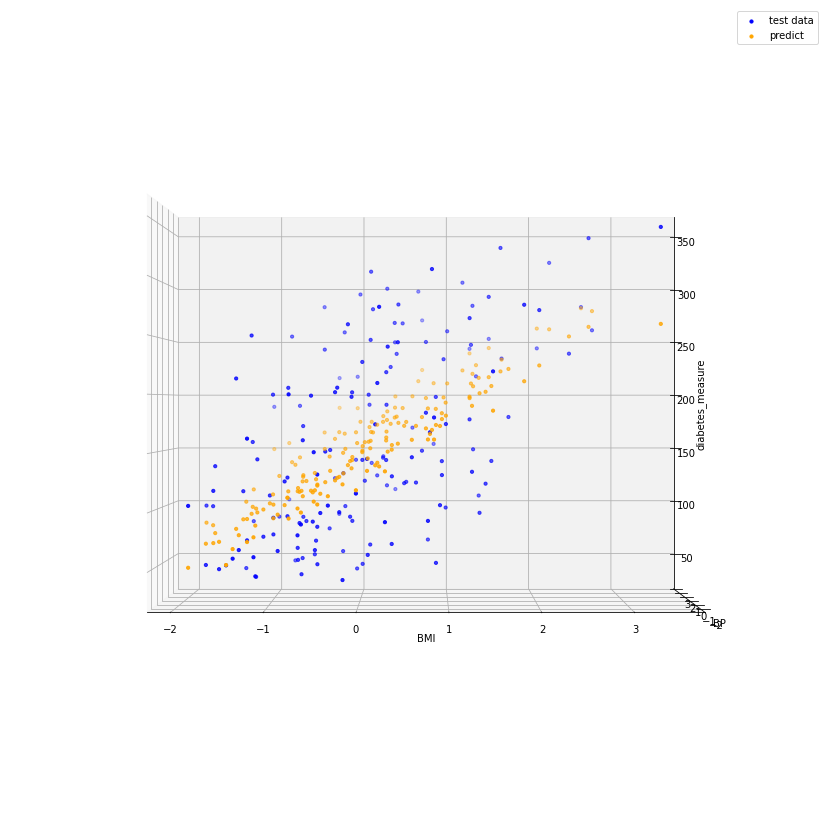

In [135]:
## Memvisualisasikan hasil regresi menggunakan scatter plot BMI vs diabetes_measure
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection = '3d')
ax.scatter(x_test_data_diabetes[:,0], x_test_data_diabetes[:,1], y_test_data_diabetes, label='test data', s=10, color='blue')
ax.scatter(x_test_data_diabetes[:,0], x_test_data_diabetes[:,1], y_pred, label='predict', s=10, color='orange')
ax.set_xlabel('BMI')
ax.set_ylabel('BP')
ax.set_zlabel('diabetes_measure')
ax.view_init(0,270)
ax.legend()

plt.show()

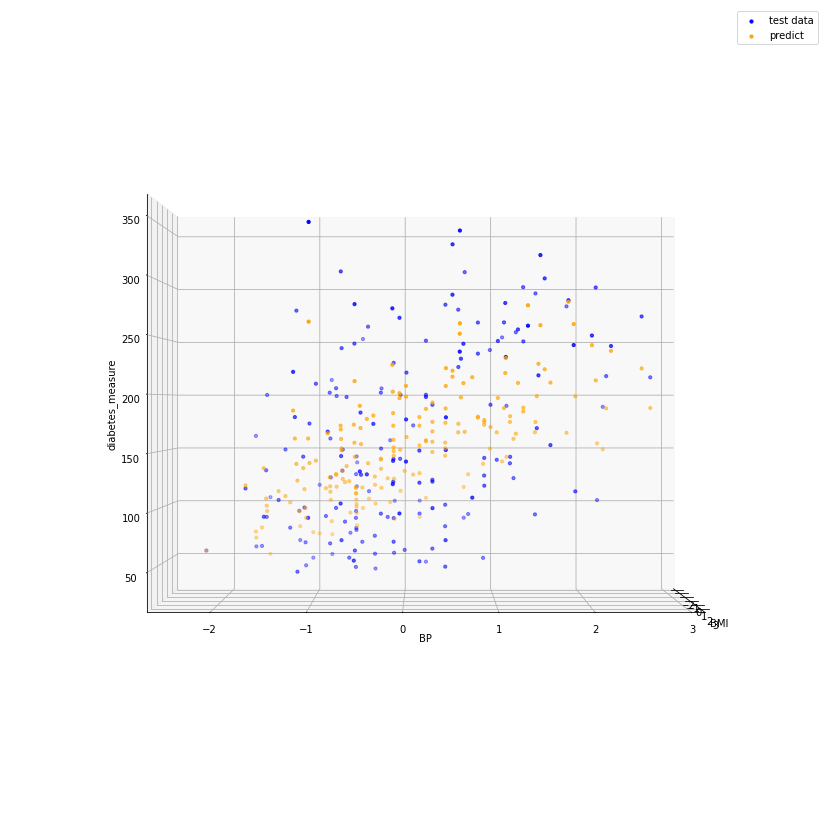

In [85]:
## Memvisualisasikan hasil regresi menggunakan scatter plot BP vs diabetes_measure
fig = plt.figure(figsize=(15,15))
ax = fig.gca(projection = '3d')
ax.scatter(x_test_data_diabetes[:,0], x_test_data_diabetes[:,1], y_test_data_diabetes, label='test data', s=10, color='blue')
ax.scatter(x_test_data_diabetes[:,0], x_test_data_diabetes[:,1], y_pred, label='predict', s=10, color='orange')
ax.set_xlabel('BMI')
ax.set_ylabel('BP')
ax.set_zlabel('diabetes_measure')
ax.view_init(0,0)
ax.legend()

plt.show()

#### Visualisasi Error Distribution

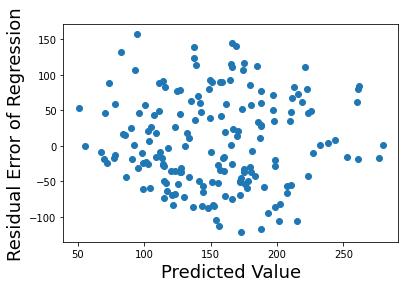

In [138]:
residu = y_test_data_diabetes - y_pred
plt.xlabel('Predicted Value', fontsize=18)
plt.ylabel('Residual Error of Regression', fontsize=18)
plt.scatter(y_pred, residu)
plt.show()

#### Observasi 
Berdasarkan hasil observasi dari visualisasi, data yang berwarna jingga (_data predict_) relatif menyebar di tengah bila ditinjau dengan data yang berwarna biru (_data test_). _Data predict_ masih memiliki gap perbedaan dengan _data test_ yang cukup besar pada $0 \leq \text{BMI} \leq 2$.

### C. Batch Gradient-descent Regression 

8. Tulis function $\text{batch_grad(learning_rate, x_train, y_train, epoch)}$ yang menghitung batch gradient-descent regression, yang mana:
    - $\text{learning_rate}$ merupakan parameter learning rate.
    - $\text{epoch}$ merupakan parameter jumlah iterasi.
    - $\text{x_train}$ merupakan matrik fitur yang berukuran $N \times D$, dengan $N$ jumlah sampel dan $D$ dimensi fitur dari data train.
    - $\text{y_train}$ merupakan vektor $\text{label}$ yang berukuran $N \times 1$ dari data train, dengan label ke-$i$ dari sampel $\text{y_train}$ harus sesuai dengan baris ke-$i$ dari $\text{x_train}$.
    - $\text{output}$ dari function ini merupakan vektor $\text{weight}$ dengan ukuran $1 \times D$, dengan $D$ dimensi fitur.

Didefinisikan $J(\theta)$ sebagai $\text{cost function}$ dan $\alpha$ didefinisikan sebagai $\text{learning rate}$. Pada sesi lab kali ini, digunakan $J(\theta)$ adalah $\text{Least Square Cost Function}$ sebagai berikut: 

$$J(\theta) = \frac{1}{2 \cdot N} \sum_{i=1}^{N}{(h_{\theta}(x^{(i)})-y^{(i)})^2}$$

yang mana $N$ merupakan banyaknya sampel dan $h_{\theta}(x^{(i)})$ merupakan fungsi hipotesis sebagai berikut:

$$h_{\theta}(x^{(i)}) = x^{(i)} \cdot \theta$$

yang mana _super script_ $(i)$ menyatakan sampel ke-$i$.

Apabila kita turunkan terhadap $\theta_{j}$ dari salah satu nilai dari vector $\theta$ (untuk mendapatkan gradient cost function):

$$
\frac{\partial}{\partial \theta_{j}}J(\theta_{j}) = \frac{1}{N}\sum_{i=1}^{N}{(h_{\theta_{j}}(x^{(i)})-y^{(i)}) \cdot x^{(i)}_{j}} \\
= \frac{1}{N}\sum_{i=1}^{N}{(x^{(i)} \cdot \theta_{j} -y^{(i)}) \cdot x^{(i)}_{j}}
$$

Sehingga apabila untuk mendapatkan turunan $\text{Least Square Cost Function}$ $\nabla J(\theta)$ kita bisa menyatakan dalam bentuk sebagai berikut:
$$\nabla J(\theta) = \frac{1}{N}x^{T}(x \cdot \theta - y)$$

In [113]:
def hipotesis(x, weight):
    return np.dot(x, weight)

def cost_function(x, y, weight):
    return residual_sum_of_squares(hipotesis(x, weight), y) / x.shape[0] * 0.5

def cost_function_2(y_pred, y):
    return residual_sum_of_squares(y_pred, y) / y.shape[0] * 0.5

def gradient_vector_from_cost_function(x, y, weight):
    transpose_x = x.transpose()
    ## Mengembalikan gradient vector berukuran D x 1
    return np.dot(transpose_x, np.subtract(np.dot(x, weight), y)) / x.shape[0]

def batch_grad(learning_rate, x_train, y_train, epoch):
    x_train = np.array(x_train)
    y_train = np.array(y_train)
    epsilon = 1e-9 # Karena floating point di python kadang tidak dapat menemukan nilai 0 dengan tepat
    curr_iter = 0 # Epoch saat ini
    N = x_train.shape[0] # Banyaknya sampel
    D = x_train.shape[1] # Banyaknya dimensi/fitur
    
    prev_error = 0 # Previous error

    ## Insialisasi theta berbentuk matrix D x 1 dengan random value
    theta = np.random.random(size=(D,1))
    
    convergent = False
    
    while not convergent:        
        ## Mendapatkan Latest LSE
        curr_error = cost_function(x_train, y_train, theta)
        
        if abs(prev_error-curr_error) <= epsilon:
            print("Learning Rate = %.9f convergent karena error-nya sudah mirip dengan err %.9f ~ %.9f pada epoch: %d" % (learning_rate, prev_error, curr_error, curr_iter))
            convergent = True
        
        curr_iter += 1

        if curr_iter == epoch:
            print('Learning Rate = %.9f berhenti karena mencapai epoch %d dengan cost-nya adalah: %.9f' % (learning_rate, epoch, curr_error))
            convergent = True

        ## Mendapatkan gradient/slope untuk theta
        gradient_theta = gradient_vector_from_cost_function(x_train, y_train, theta)
                    
        ## Memperbarui nilai theta bila belum convergent
        theta -= learning_rate * gradient_theta
        
        ## Mengganti nilai previous error menjadi current erro
        prev_error = curr_error
    return theta.transpose()

9. Tulis function $\text{batch_grad_predict(x_test, weight)}$ yang digunakan untuk memprediksi label untuk sampel baru. Yang mana:
    - $\text{x_test}$ merupakan matriks fitur yang berukuran $N \times D$, dengan $N$ jumlah sampel dan $D$ dimensi fitur dari data test.
    - $\text{weight}$ merupakan vektor weight yang berukuran $1 \times D$, dengan $D$ dimensi fitur.
    - $\text{output}$ dari function ini merupakan vektor label $\text{y_pred}$ berukuran $N \times 1$ yang merupakan prediksi label dari data test.

In [114]:
def batch_grad_predict(x_test, weight):
    return np.dot(x_test, weight.transpose())

10. Implementasikan function $\text{batch_grad(x_train, y_train)}$ dan $\text{batch_grad_predict(x_test,weight)}$ pada data train dan data test yg telah dibagi dan dilakukan pre-proses pada dua poin (8 dan 9) sebelumnya.

In [122]:
learning_rates = [0.5, 0.1, 0.05, 0.01, 0.005, 0.001, 0.0005, 0.0001]
epochs = [5, 10, 50, 100, 1000, 10000, 100000, 1000000]

y_pred_batch_grad = np.zeros((len(learning_rates), len(epochs)), dtype=object)

for i in range(len(learning_rates)):
    for j in range(len(epochs)):
        ## Mendapatkan vector weight dari data train
        weight_batch_grad_tmp = batch_grad(learning_rate=learning_rates[i], x_train=x_train_data_diabetes, y_train=y_train_data_diabetes, epoch=epochs[j])

        ## Melakukan predict menggunakan test data dan vector weight
        y_pred_batch_grad[i][j] = batch_grad_predict(x_test=x_test_data_diabetes, weight=weight_batch_grad_tmp)


Learning Rate = 0.500000000 berhenti karena mencapai epoch 5 dengan cost-nya adalah: 1688.937647577
Learning Rate = 0.500000000 berhenti karena mencapai epoch 10 dengan cost-nya adalah: 1633.202931694
Learning Rate = 0.500000000 convergent karena error-nya sudah mirip dengan err 1632.852900824 ~ 1632.852900823 pada epoch: 38
Learning Rate = 0.500000000 convergent karena error-nya sudah mirip dengan err 1632.852900824 ~ 1632.852900823 pada epoch: 38
Learning Rate = 0.500000000 convergent karena error-nya sudah mirip dengan err 1632.852900824 ~ 1632.852900823 pada epoch: 38
Learning Rate = 0.500000000 convergent karena error-nya sudah mirip dengan err 1632.852900824 ~ 1632.852900823 pada epoch: 38
Learning Rate = 0.500000000 convergent karena error-nya sudah mirip dengan err 1632.852900824 ~ 1632.852900823 pada epoch: 38
Learning Rate = 0.500000000 convergent karena error-nya sudah mirip dengan err 1632.852900824 ~ 1632.852900823 pada epoch: 38
Learning Rate = 0.100000000 berhenti karena

In [123]:
y_pred_batch_grad = np.array(y_pred_batch_grad, dtype=object)
print(y_pred_batch_grad.shape)

(8, 8)


11. Visualisaikan hasil garis regresi pada dataset diabetes menggunakan scatter plot untuk learning rate $(0.5, 0.1, 0.005, 0.001, 0.0001)$ dan lakukan analisa terhadap hasil yang Anda peroleh.

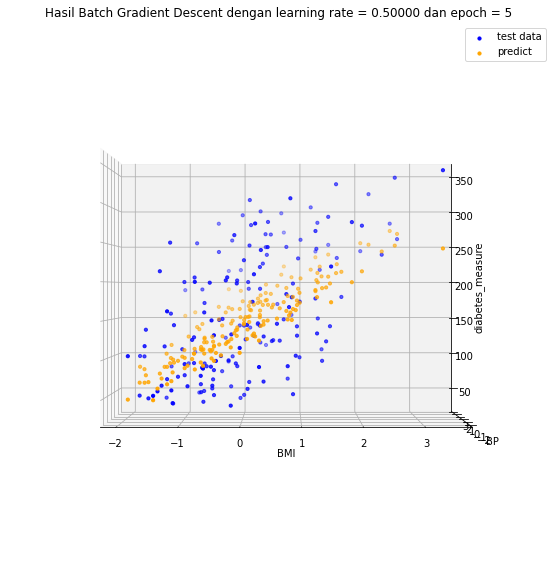

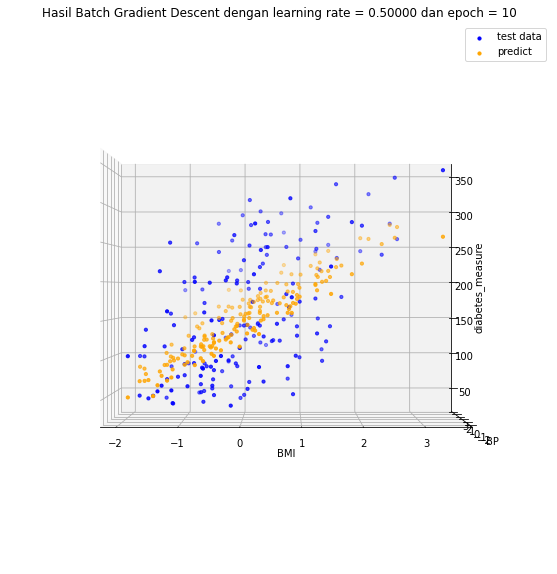

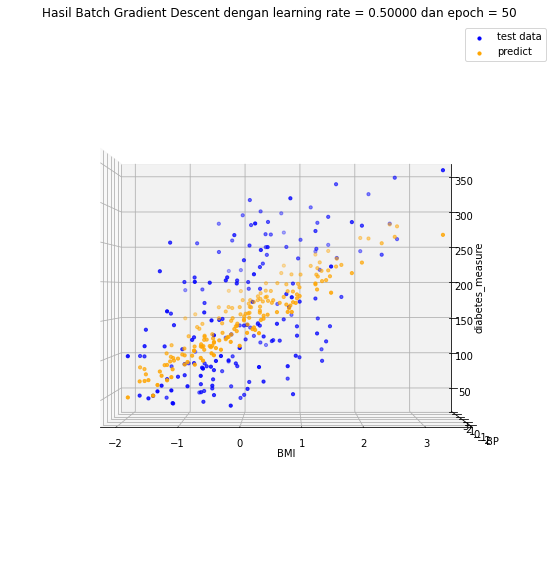

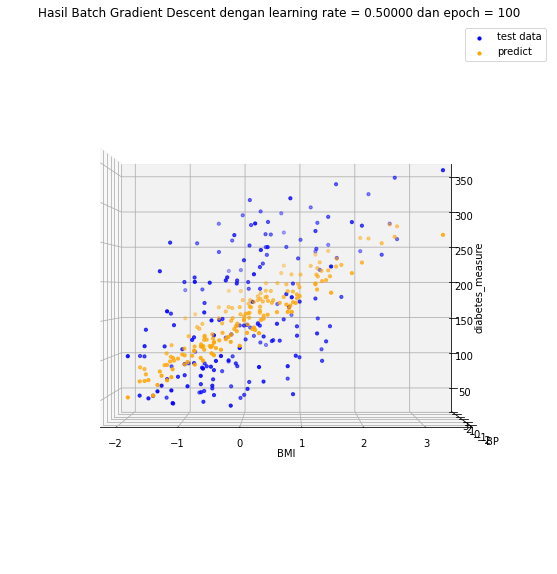

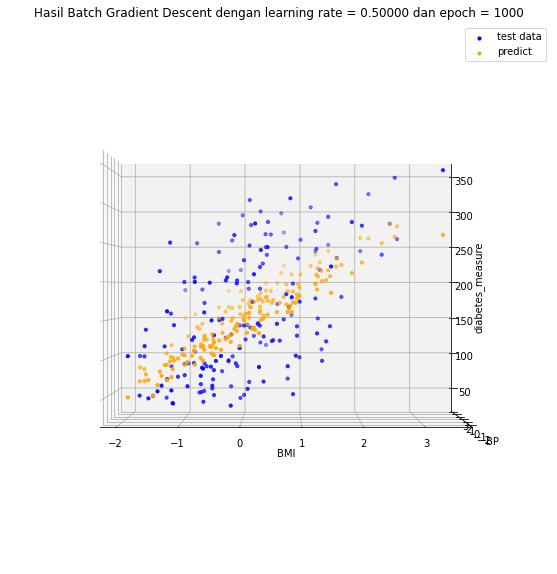

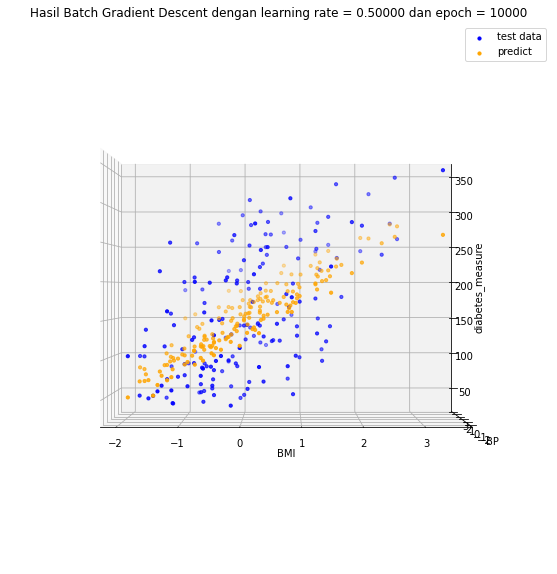

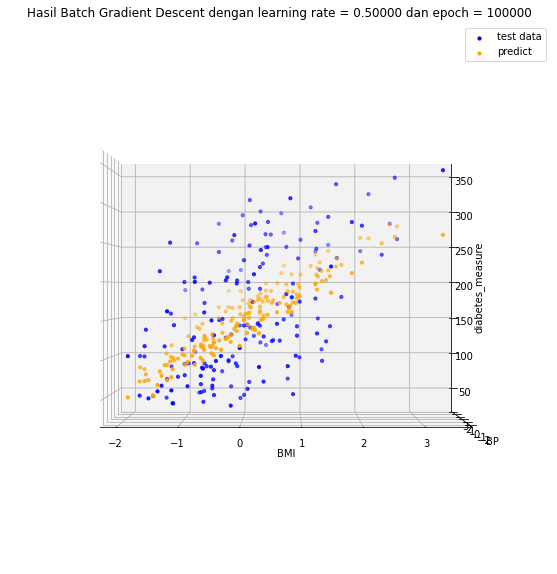

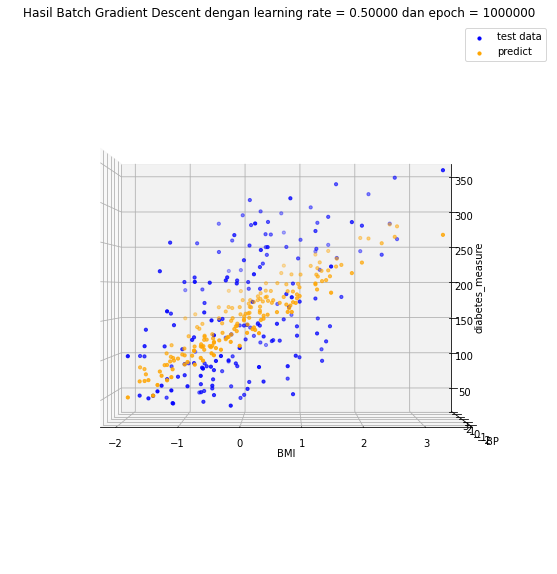

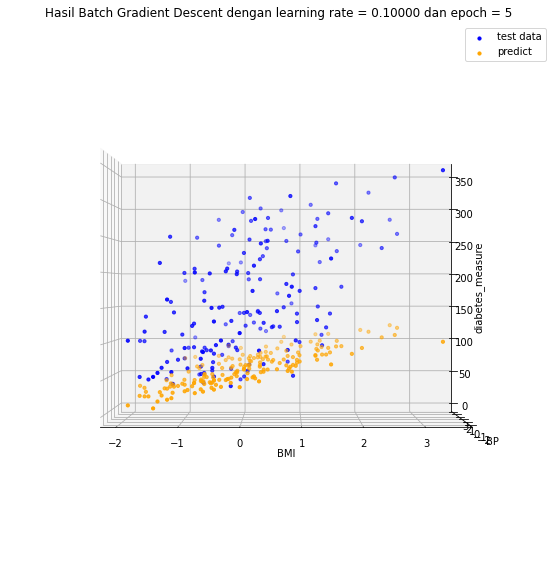

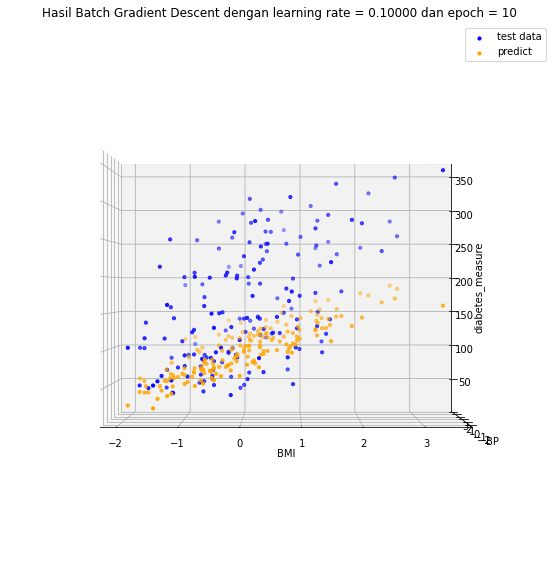

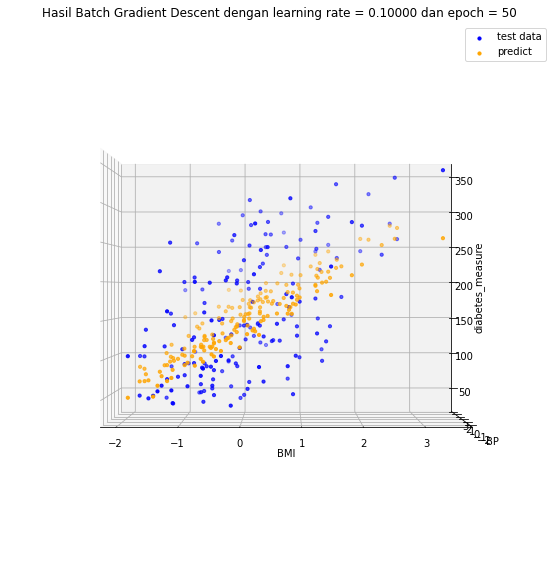

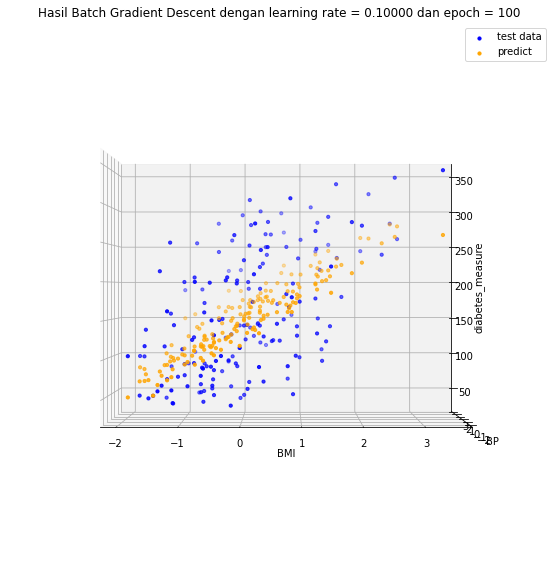

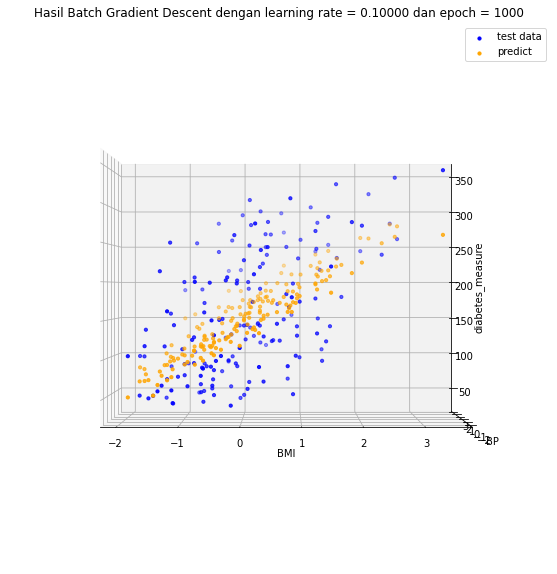

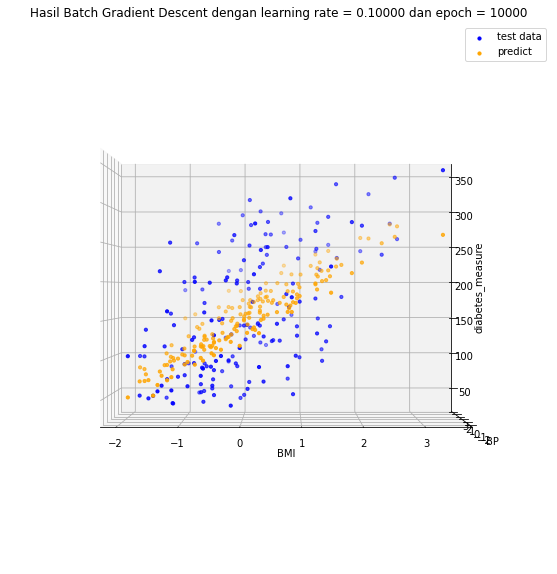

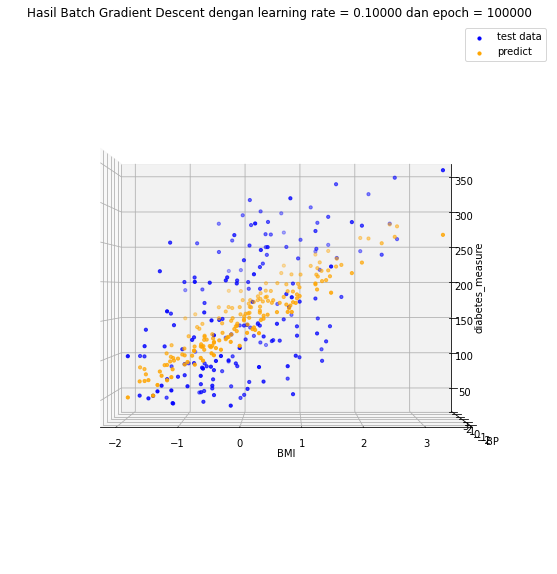

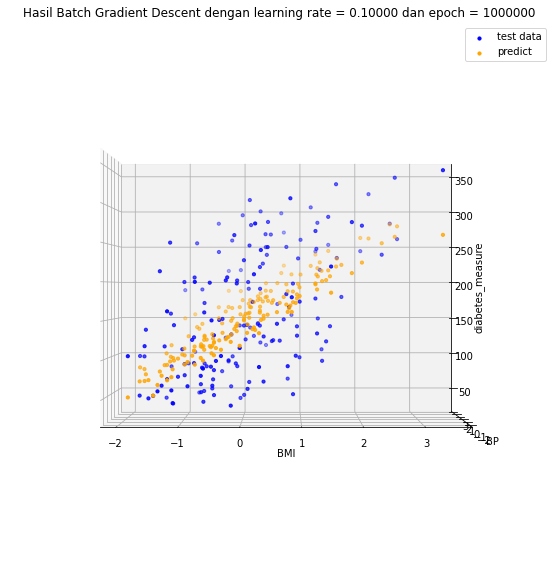

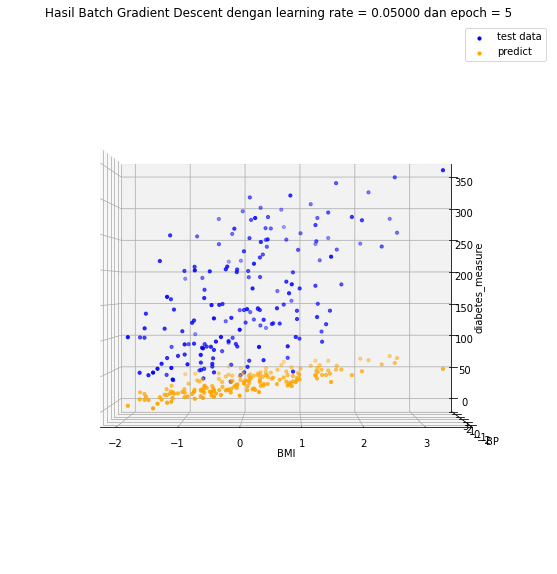

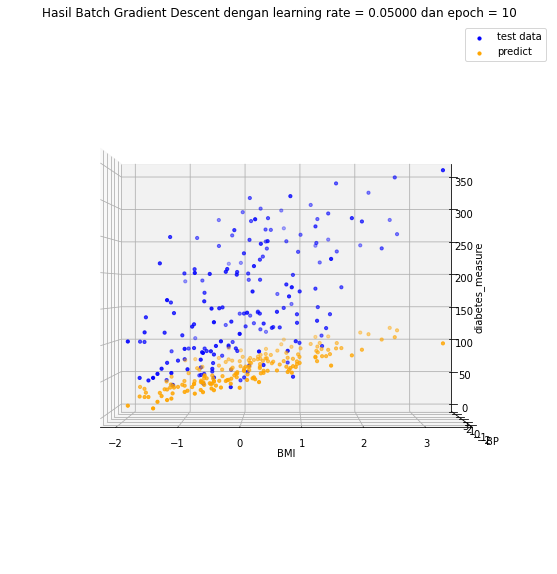

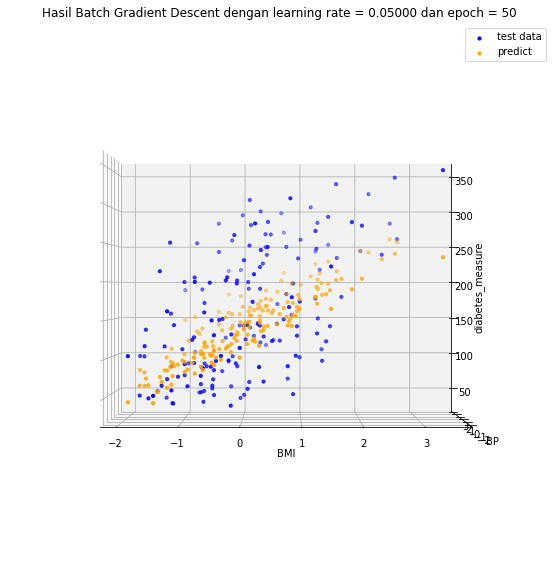

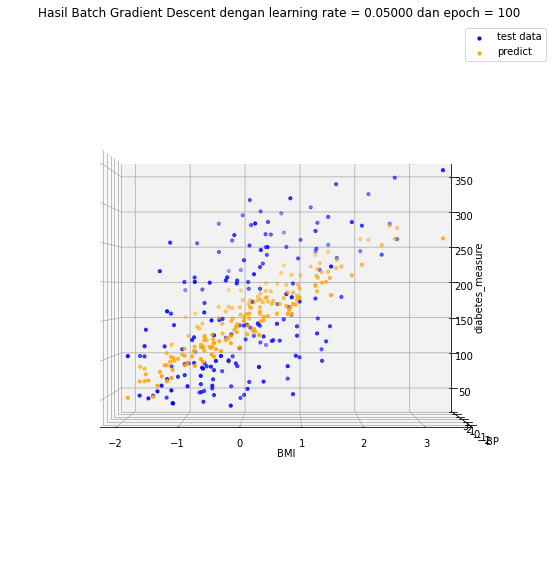

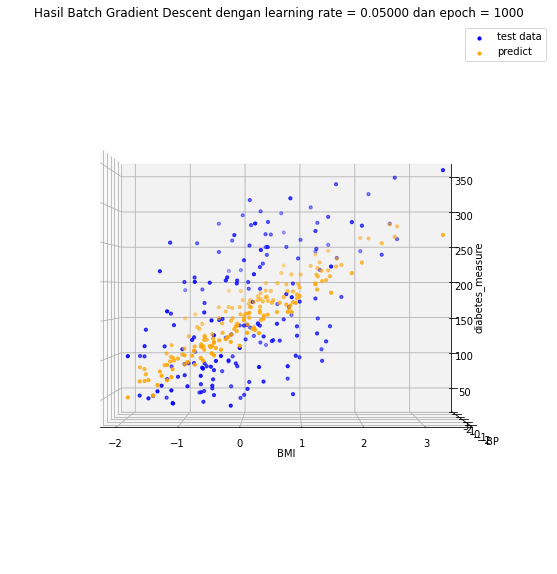

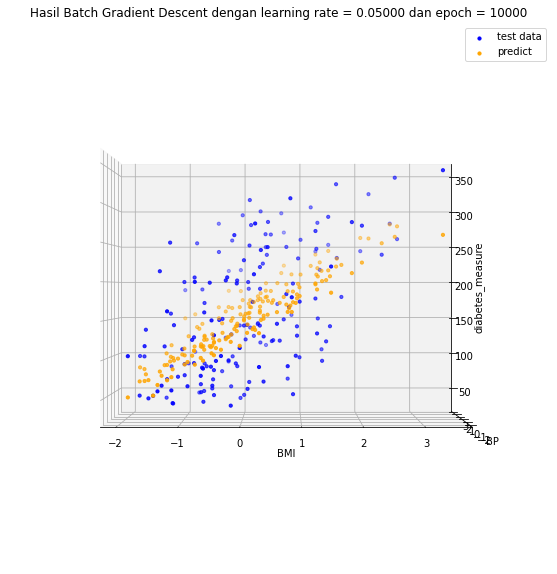

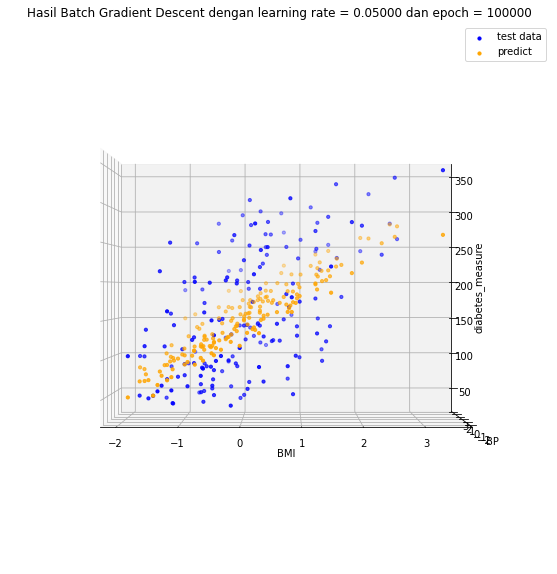

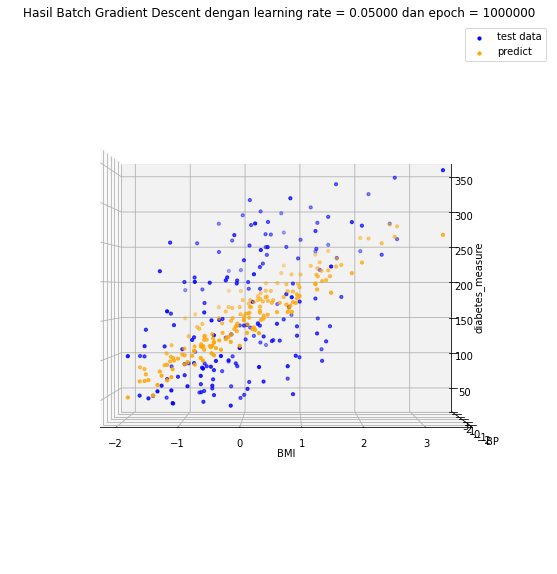

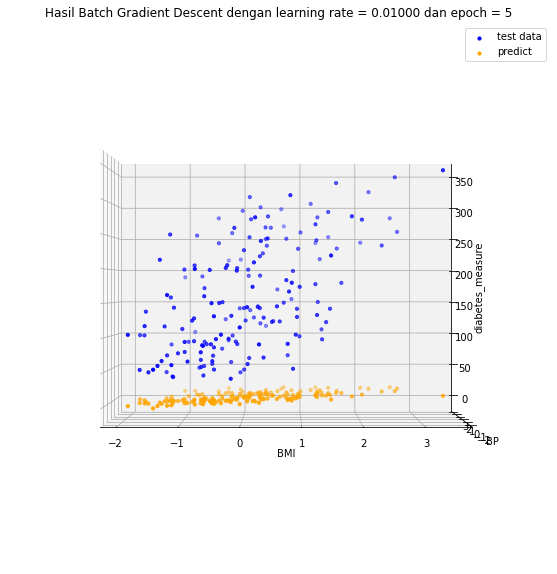

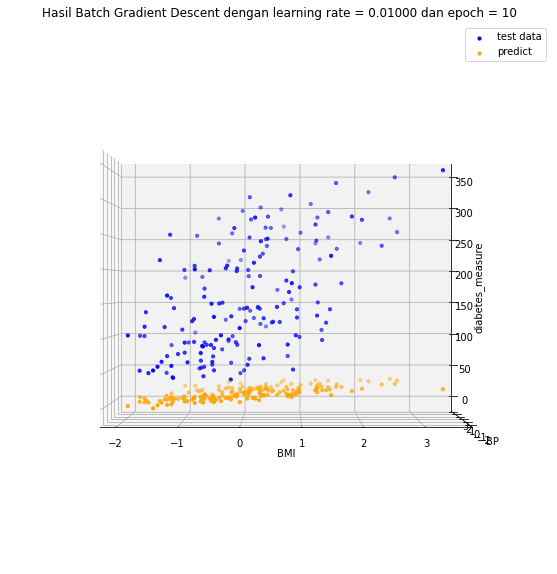

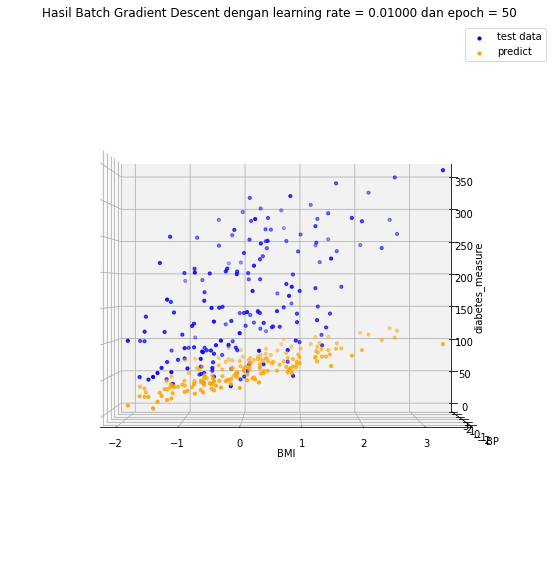

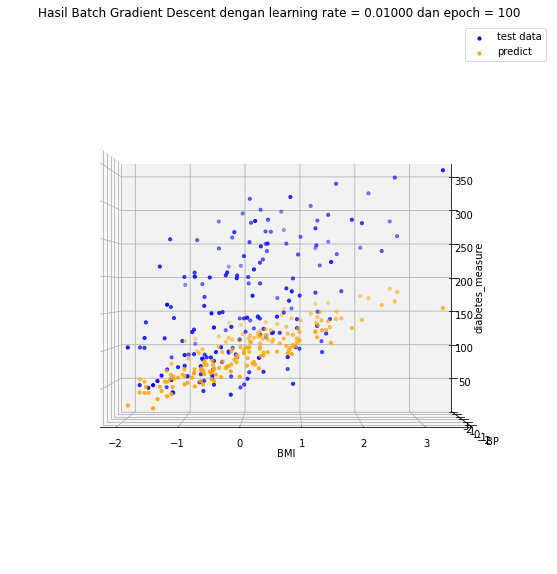

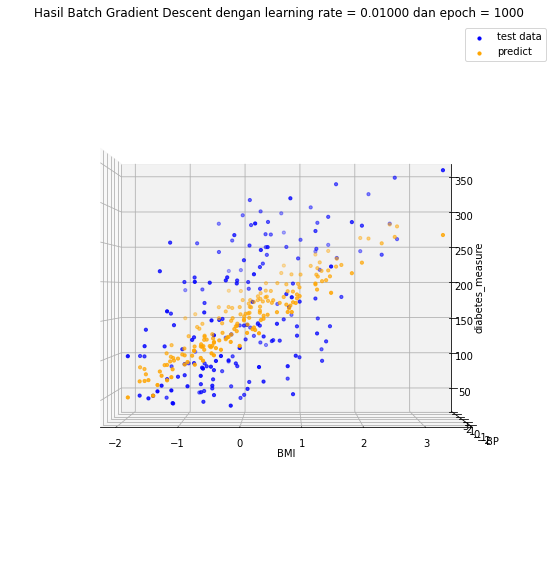

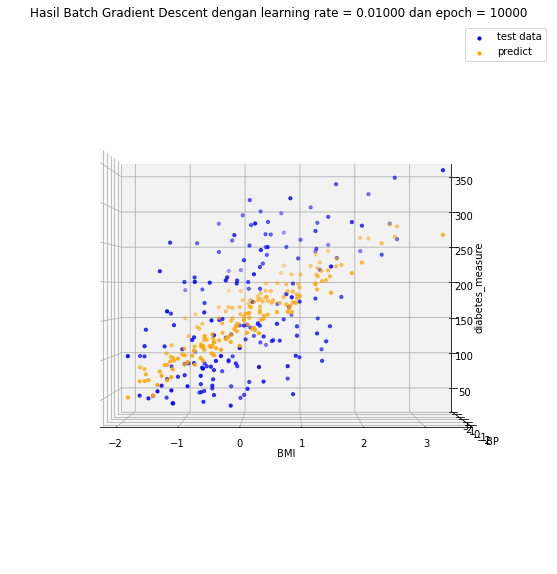

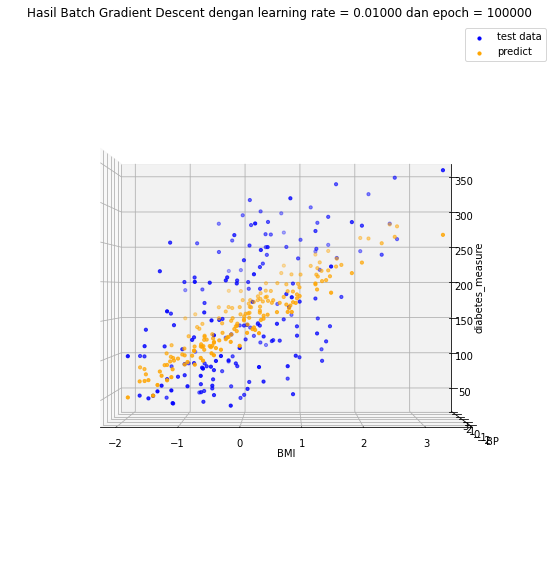

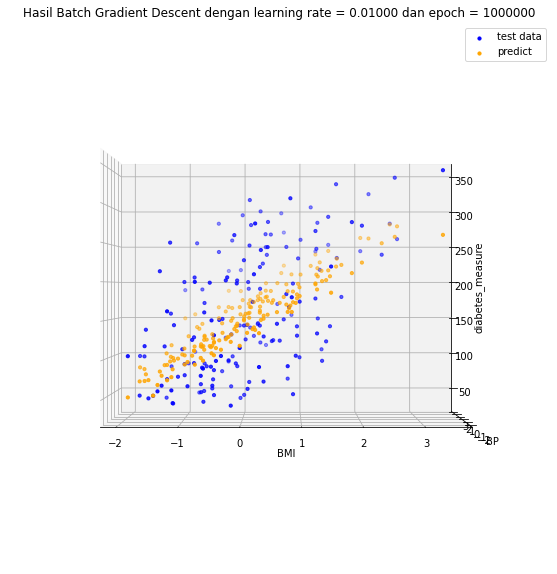

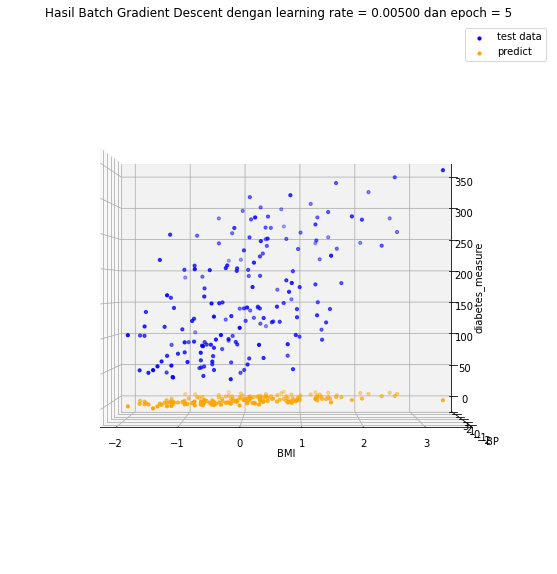

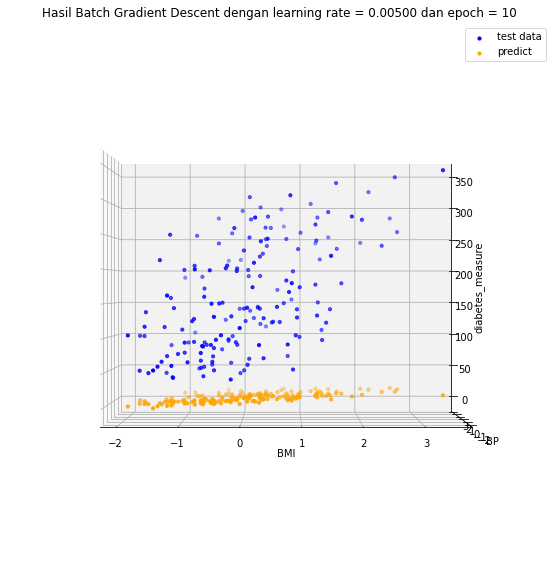

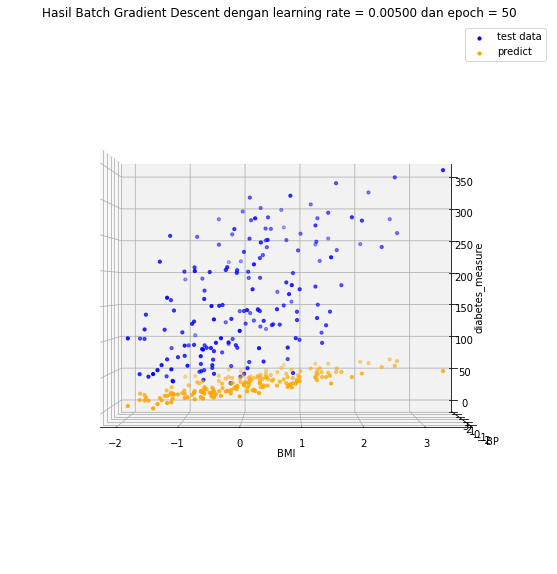

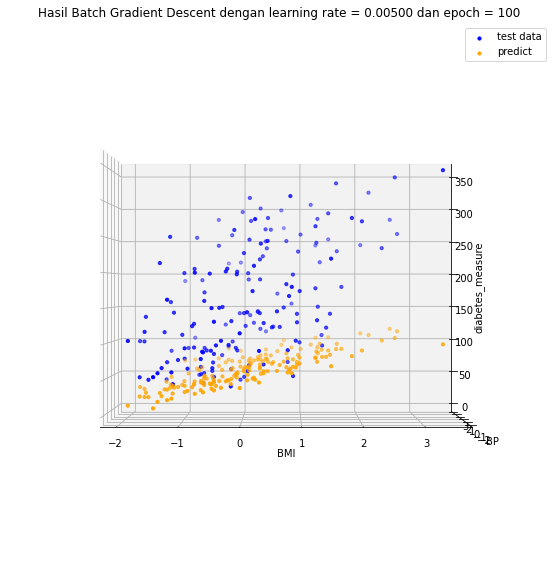

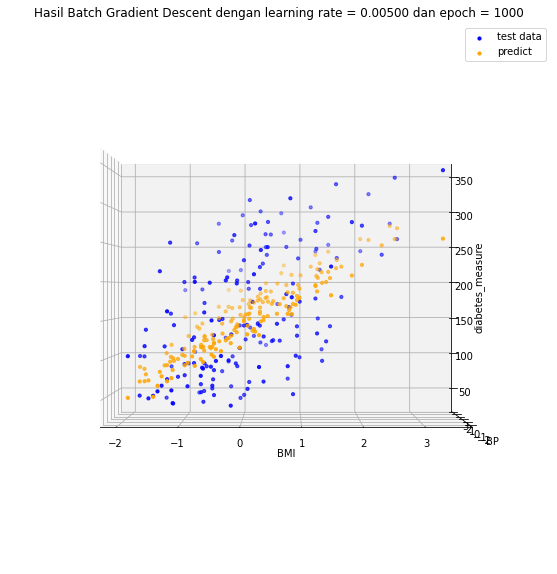

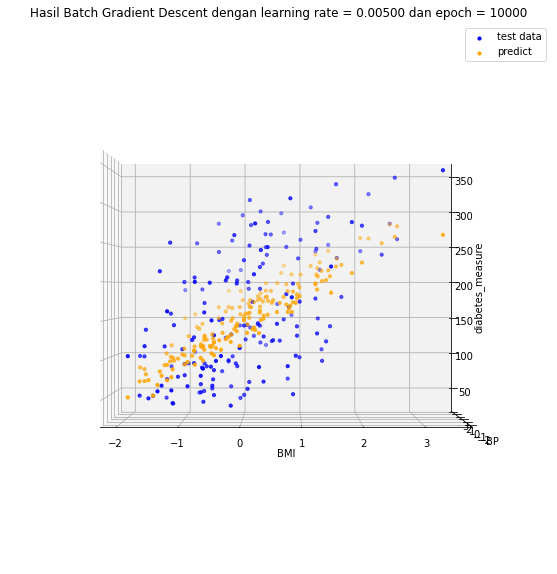

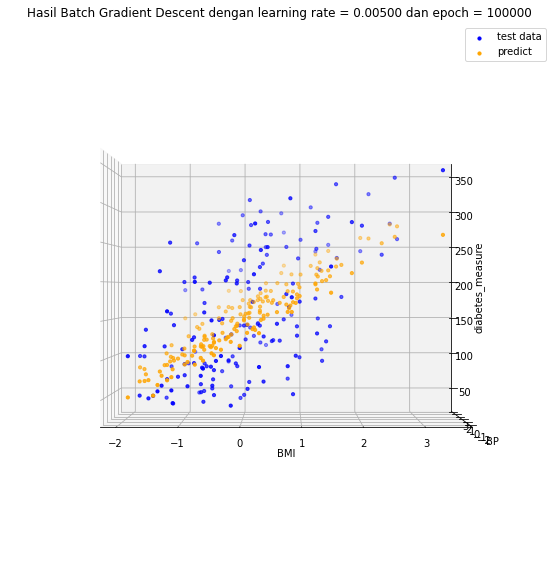

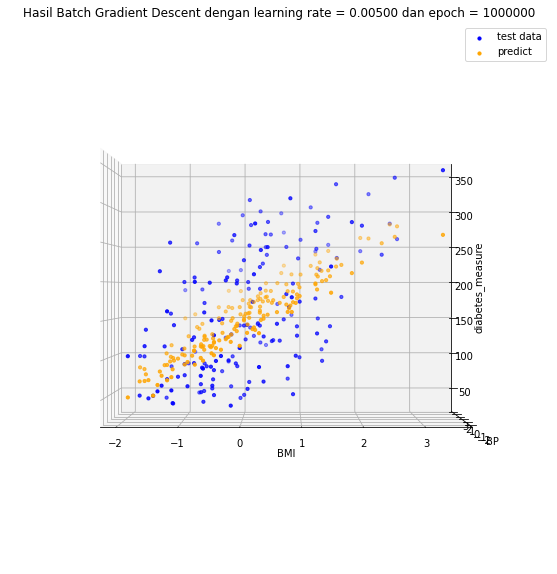

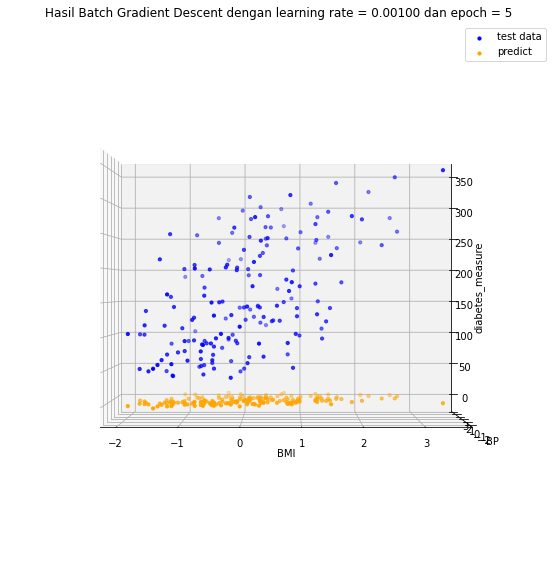

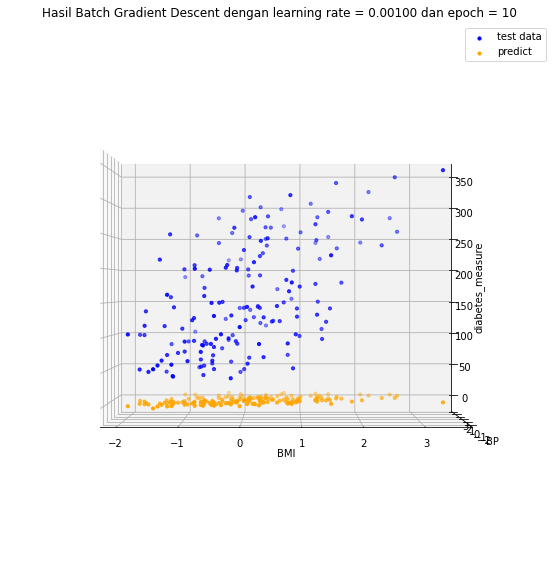

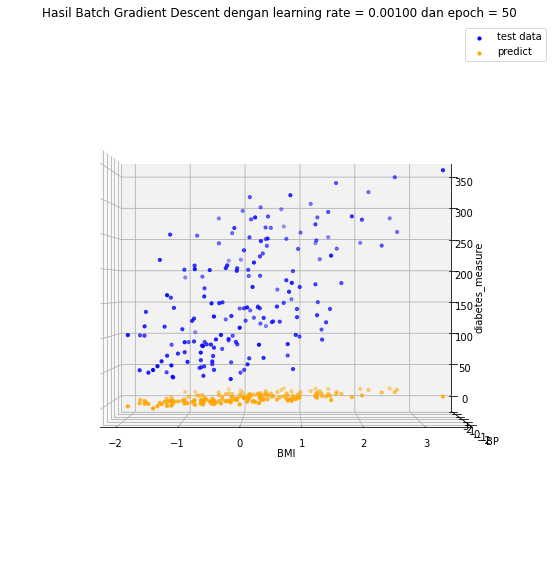

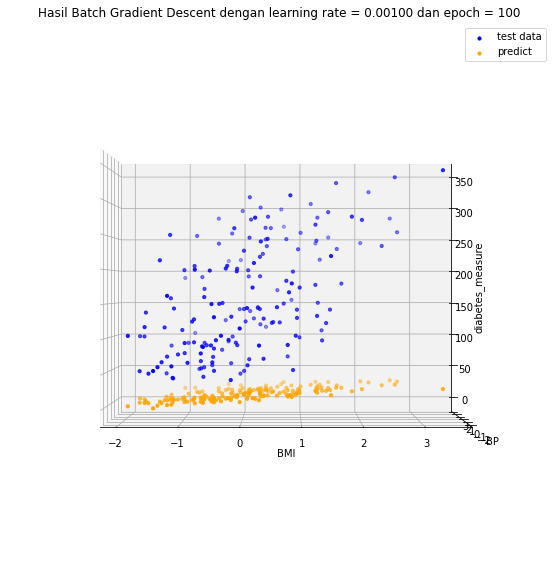

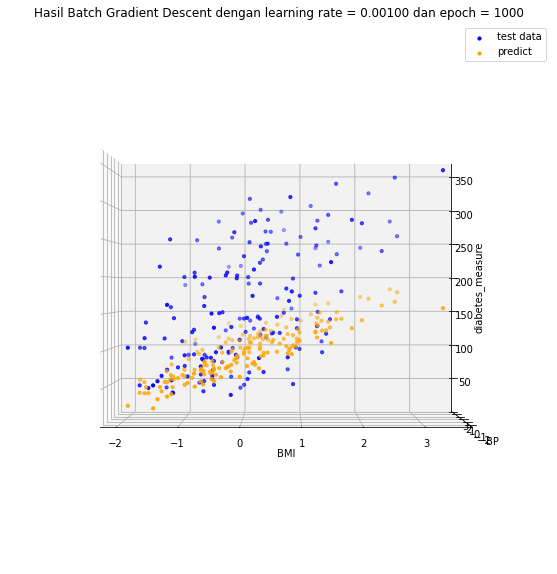

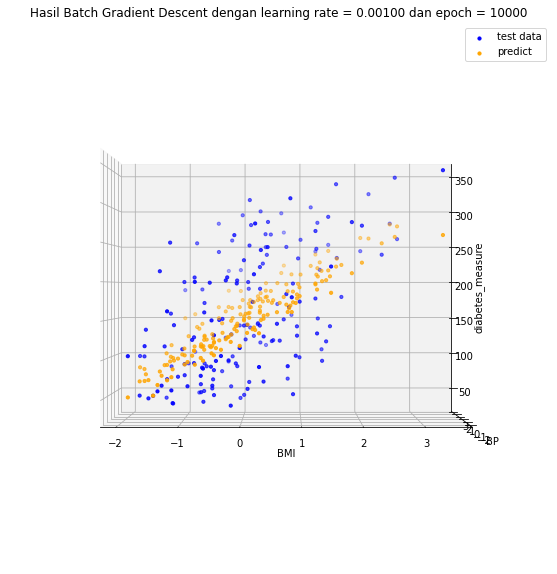

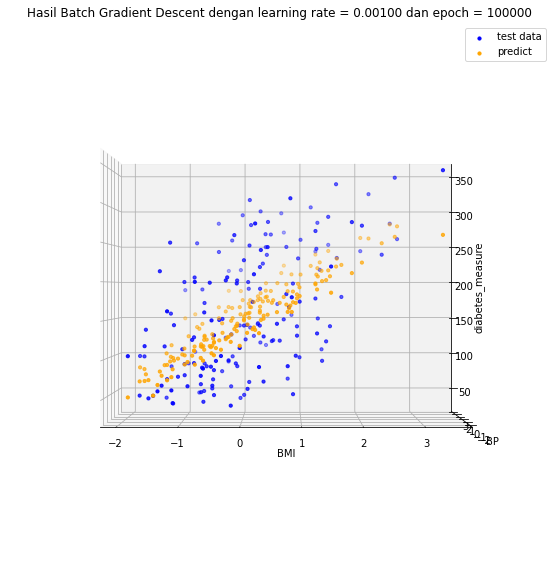

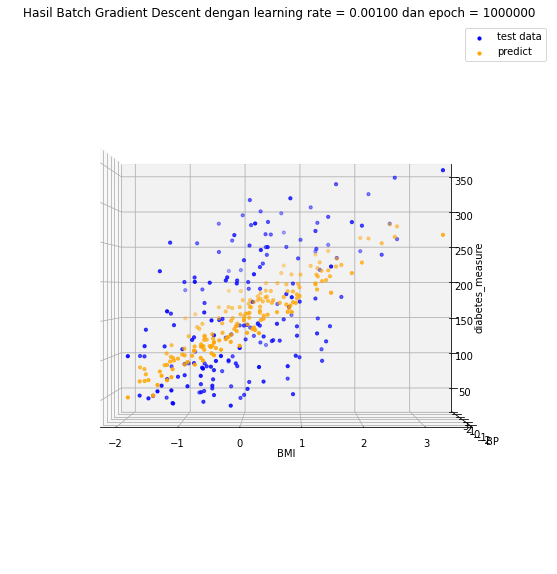

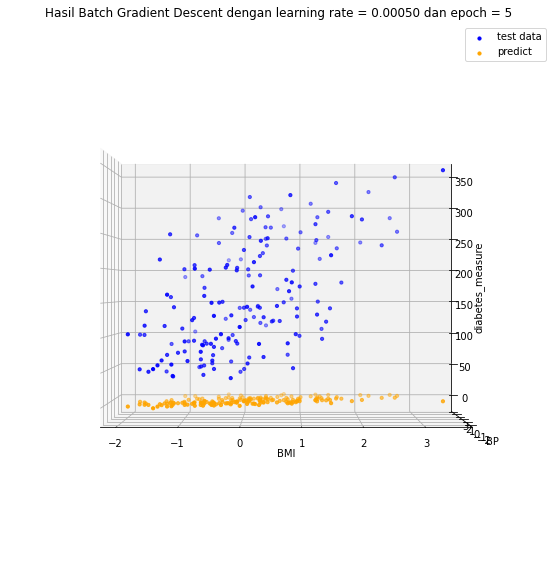

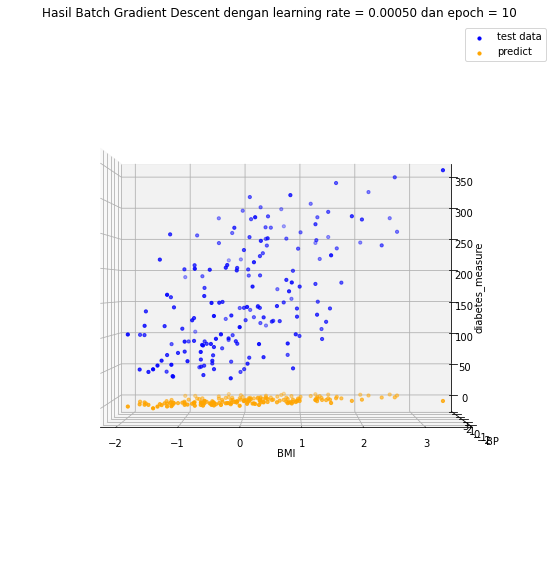

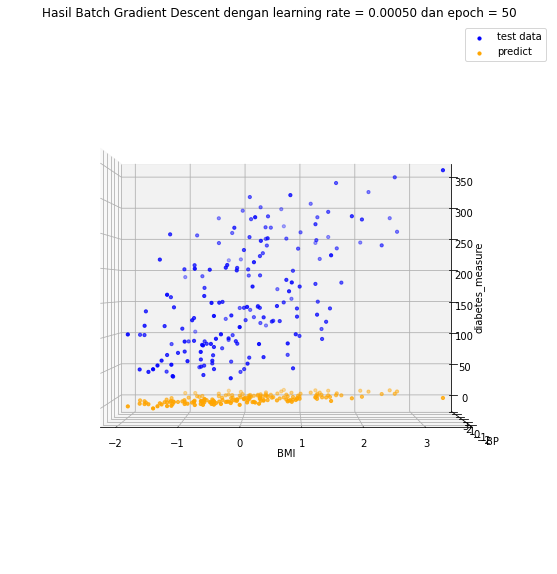

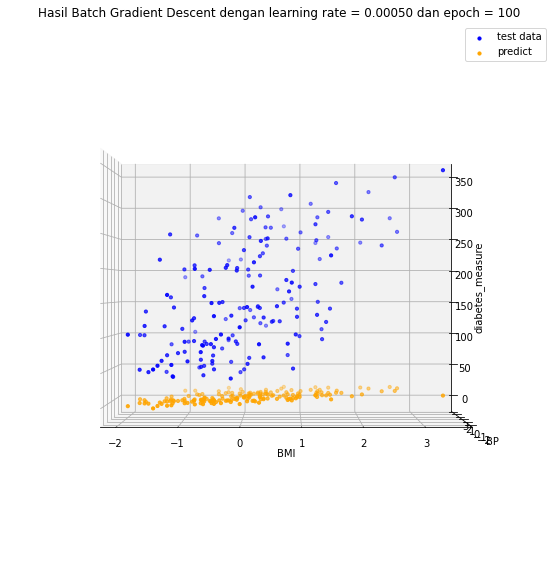

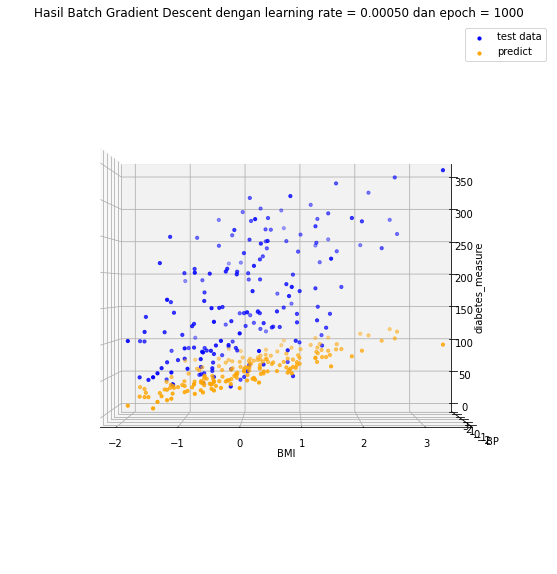

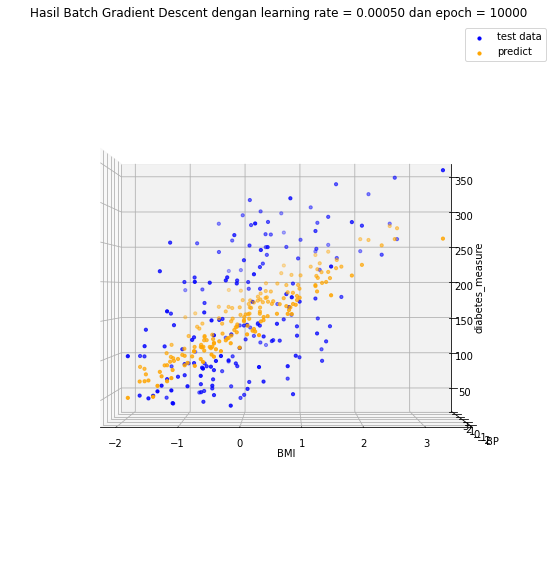

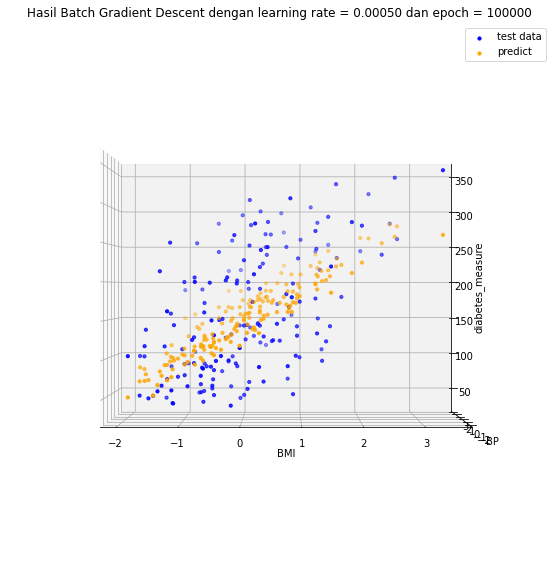

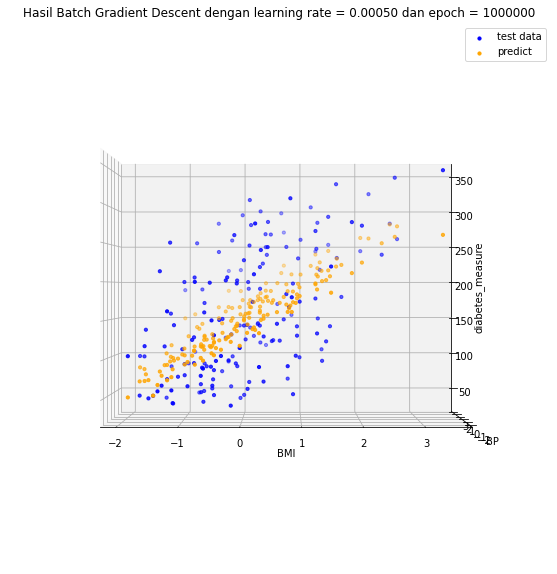

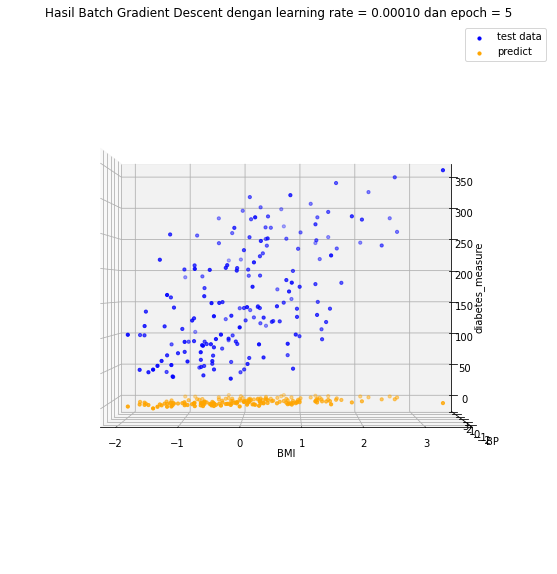

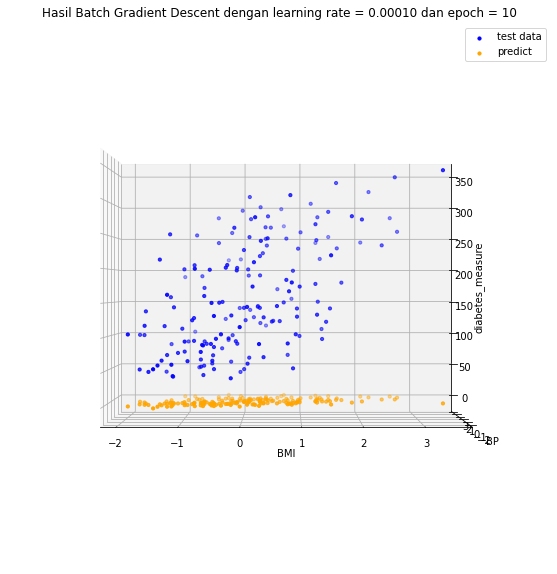

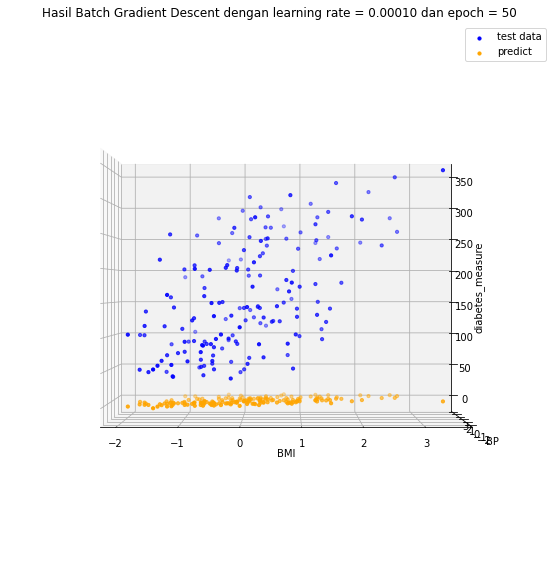

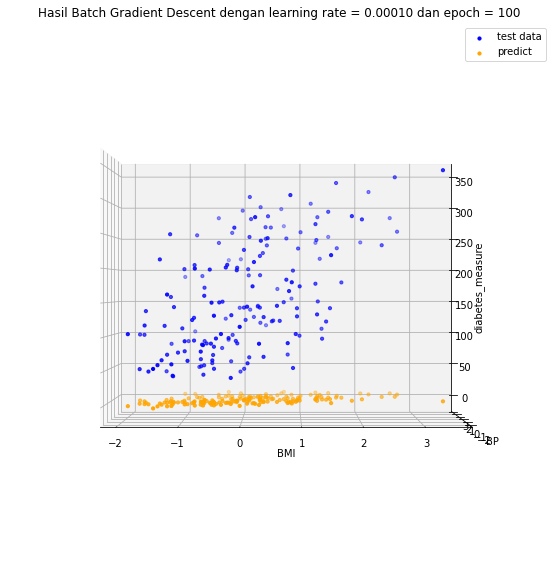

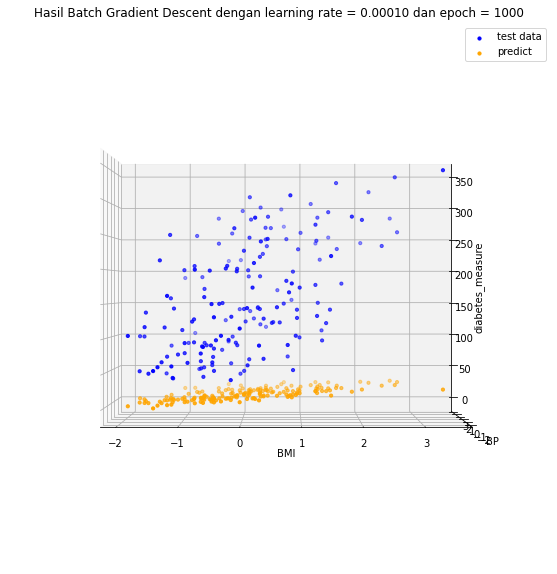

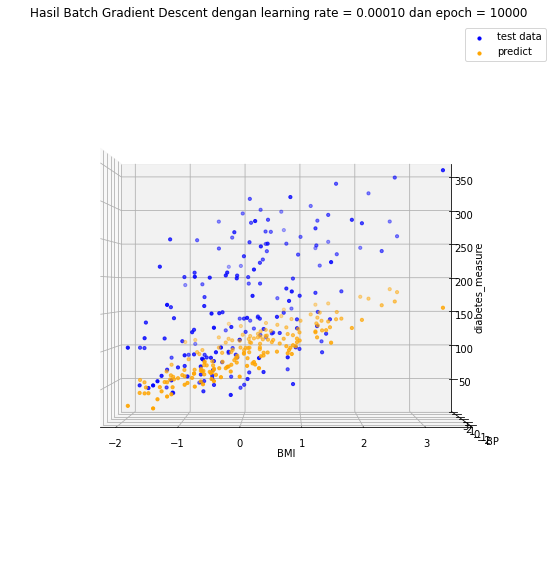

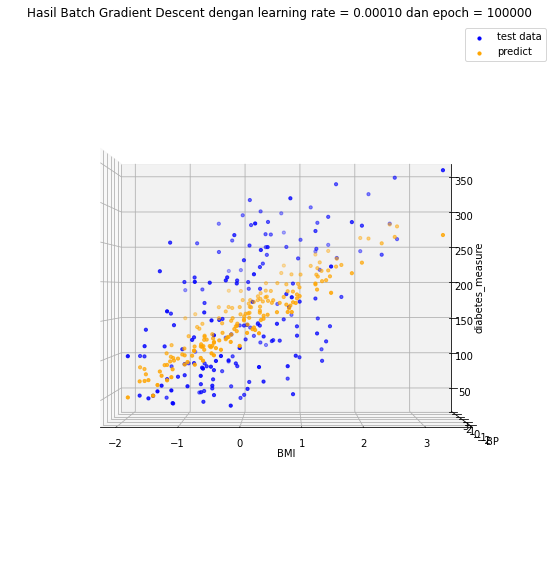

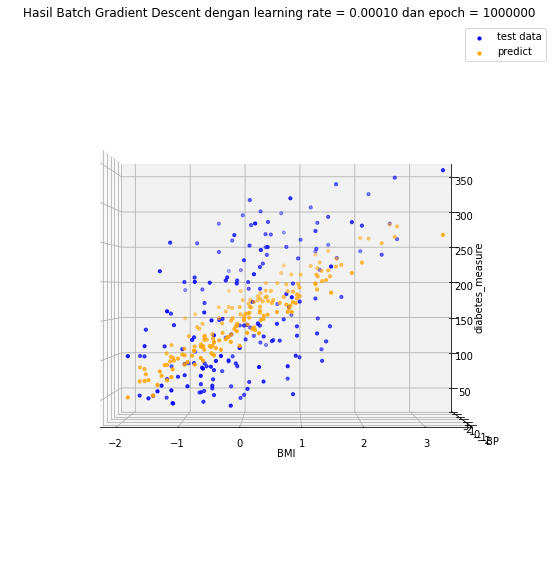

In [124]:
## Memvisualisasikan hasil regresi menggunakan scatter plot BMI vs diabetes_measure
for i in range(len(learning_rates)):
    for j in range(len(epochs)):
        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection = '3d')
        ax.scatter(x_test_data_diabetes[:,0], x_test_data_diabetes[:,1], y_test_data_diabetes, label='test data', s=10, color='blue')
        ax.scatter(x_test_data_diabetes[:,0], x_test_data_diabetes[:,1], y_pred_batch_grad[i][j], label='predict', s=10, color='orange')
        ax.set_xlabel('BMI')
        ax.set_ylabel('BP')
        ax.set_zlabel('diabetes_measure')
        ax.view_init(0,270)
        ax.set_title('Hasil Batch Gradient Descent dengan learning rate = %.5f dan epoch = %d' % (learning_rates[i], epochs[j]))
        ax.legend()

        plt.show()

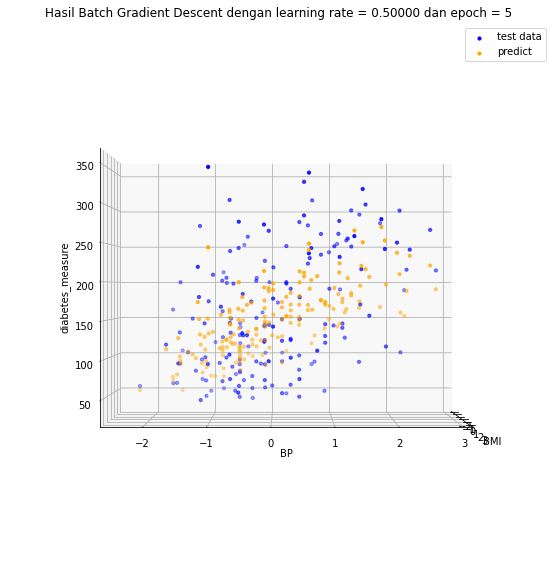

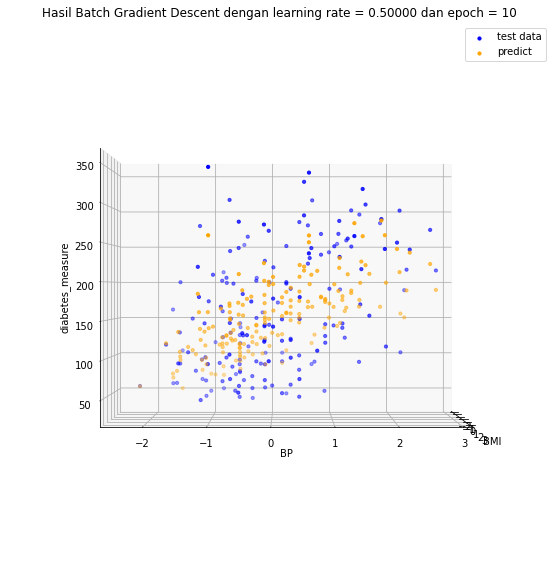

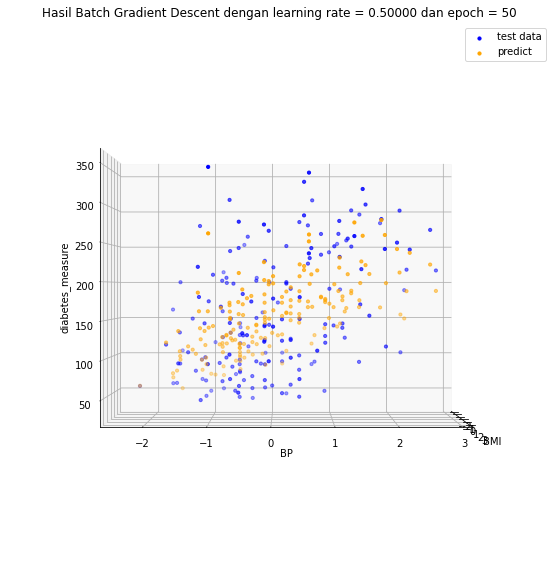

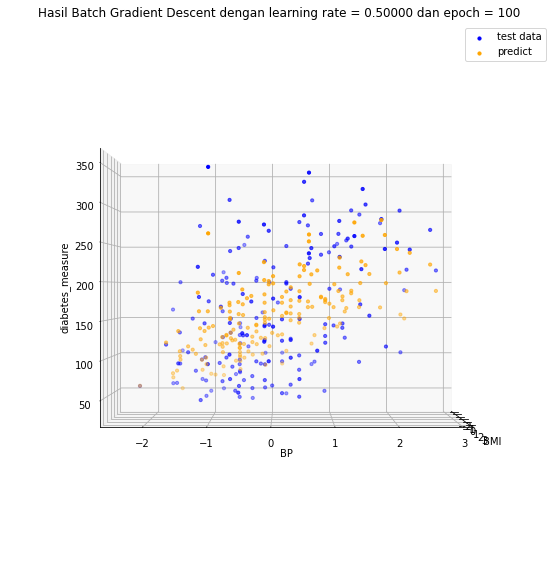

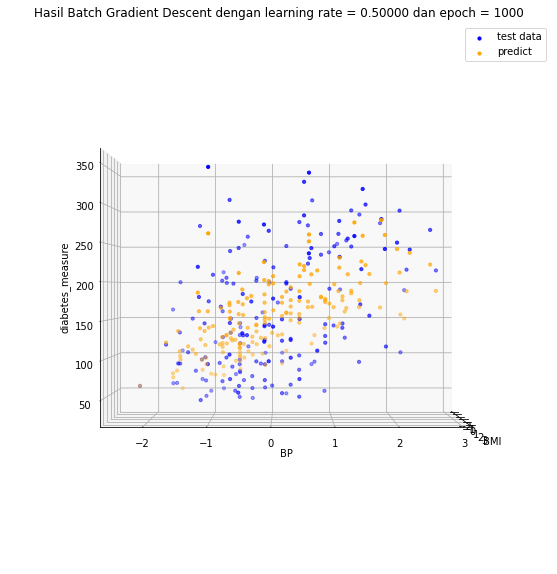

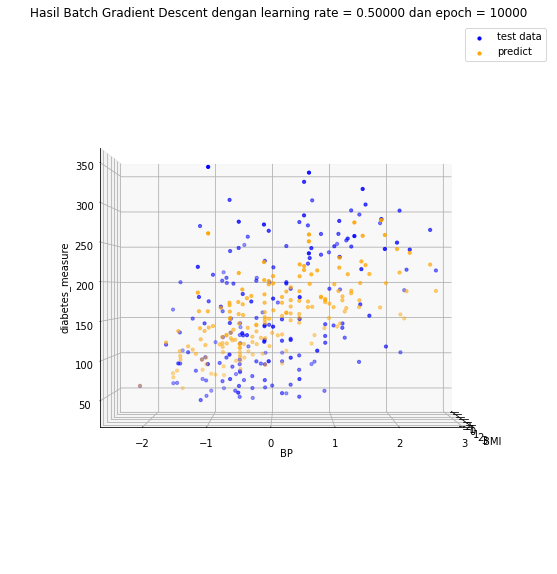

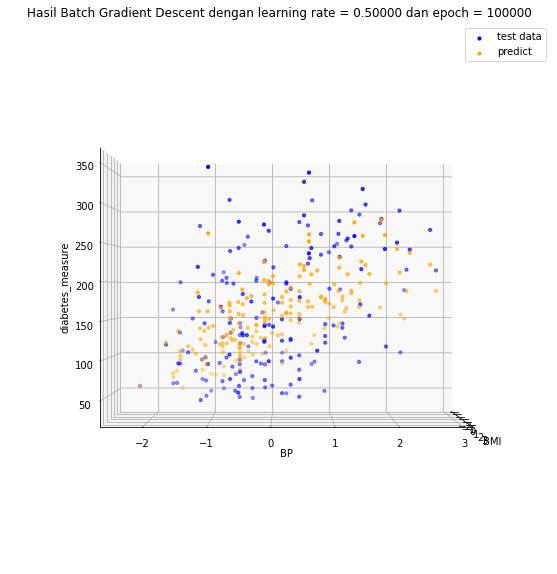

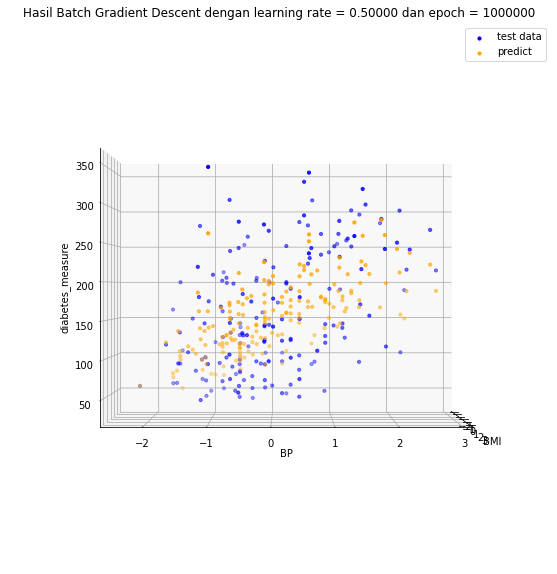

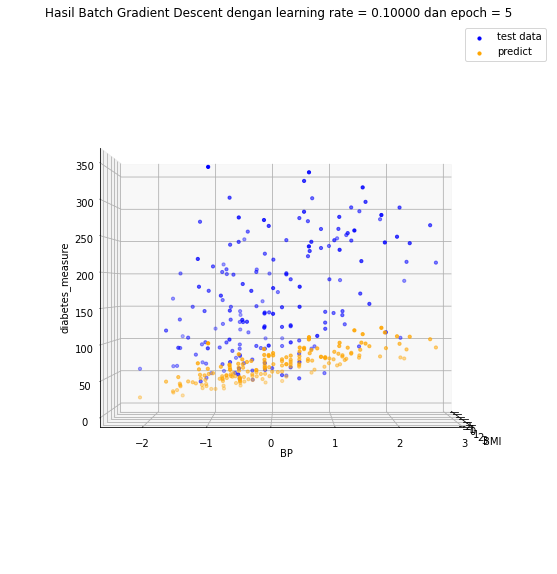

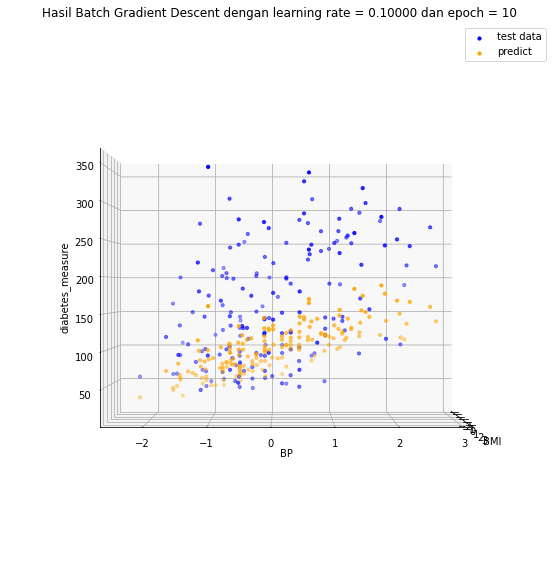

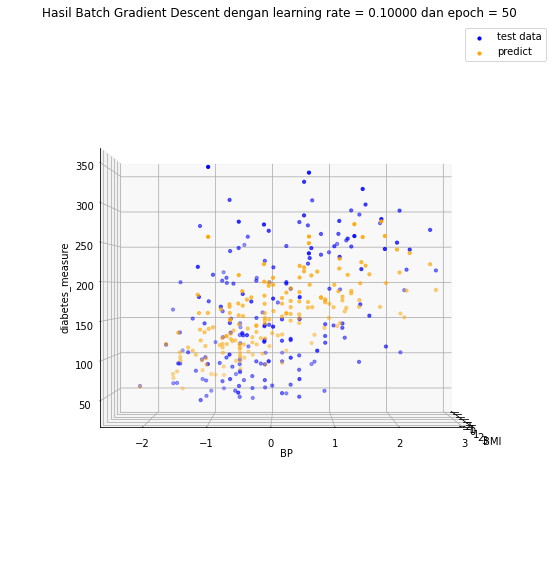

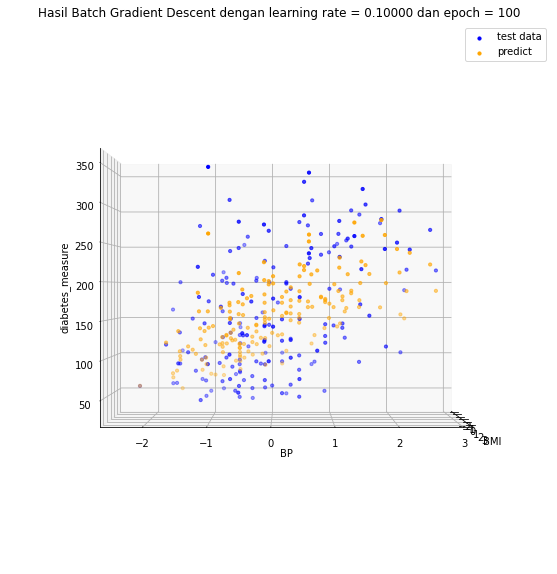

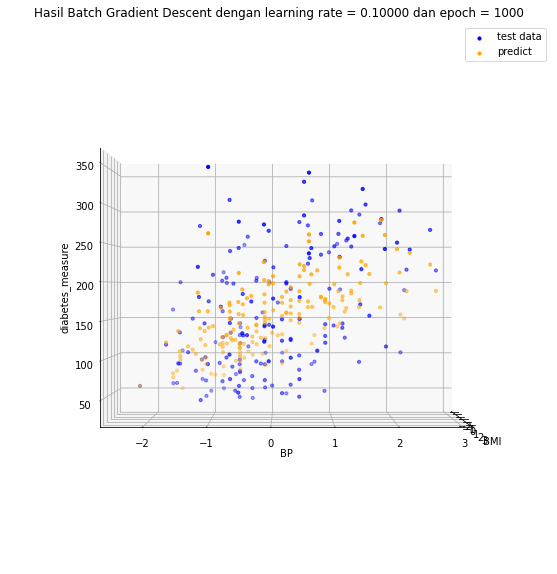

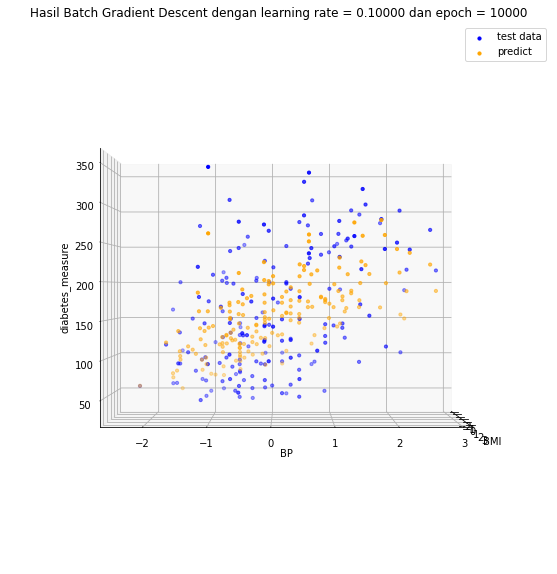

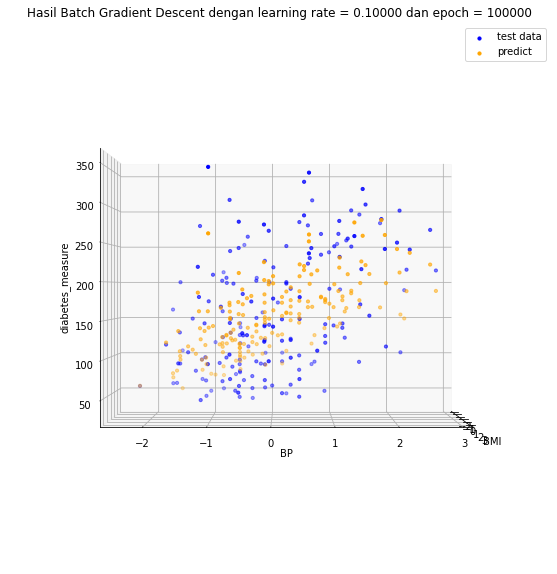

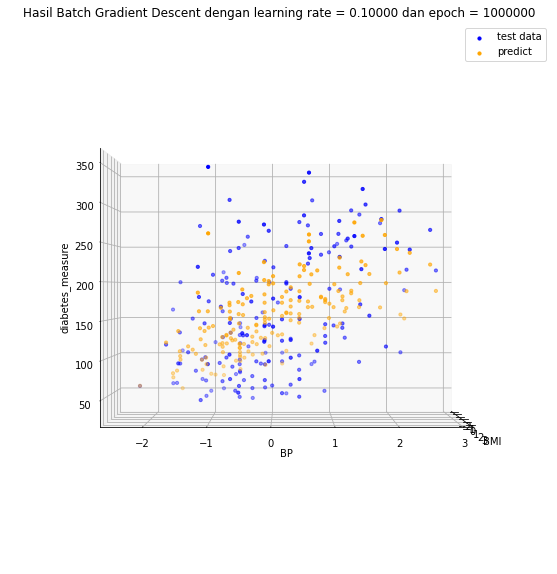

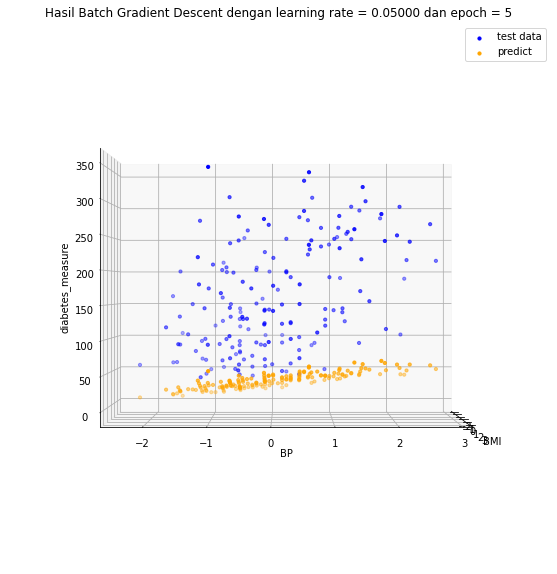

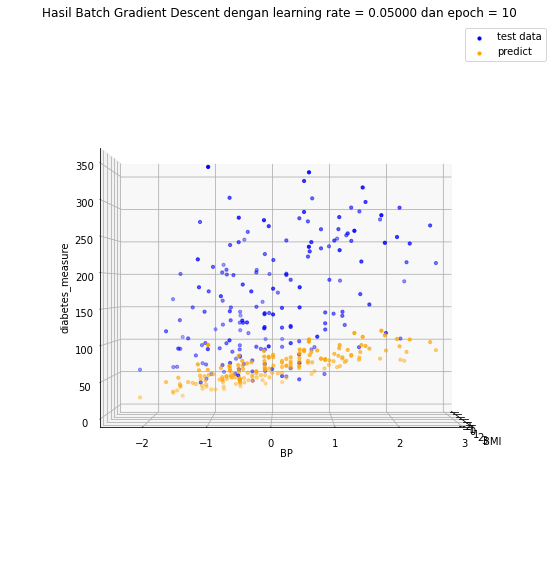

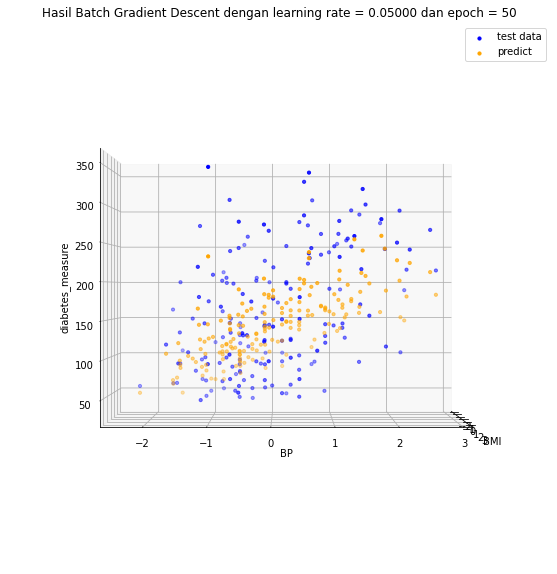

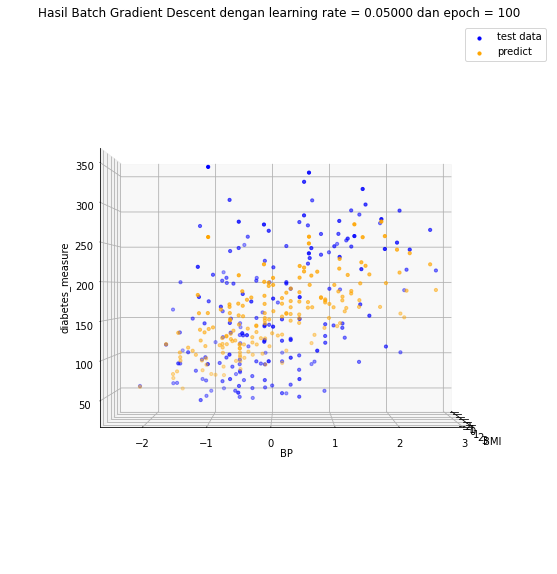

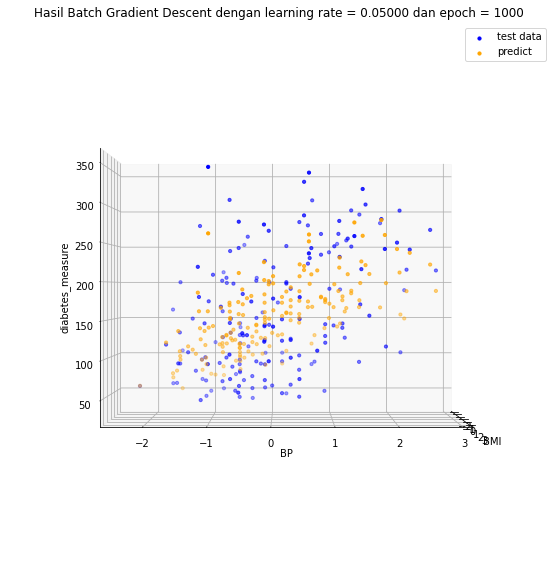

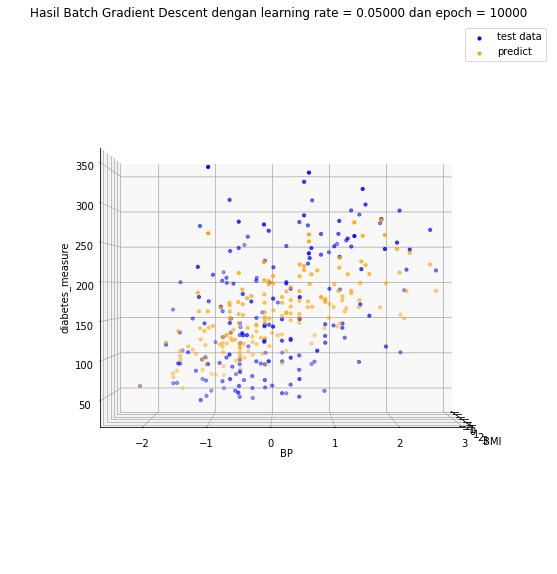

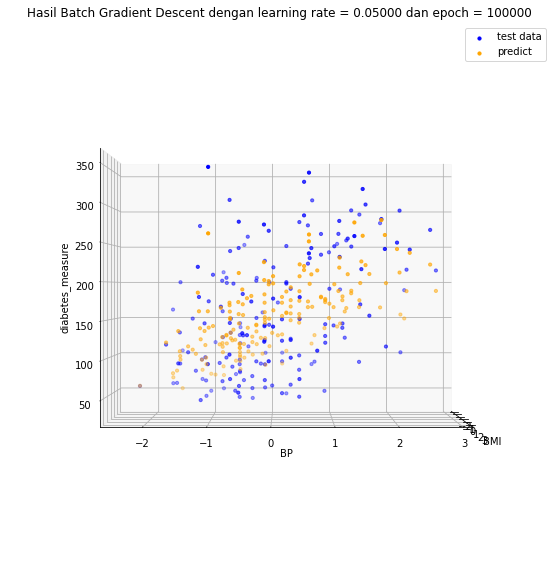

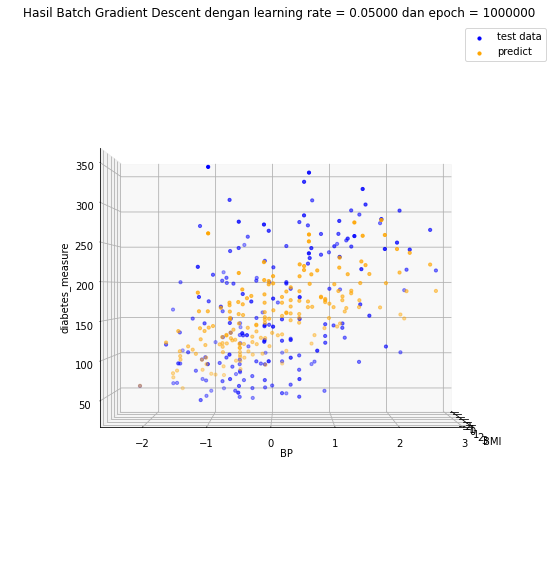

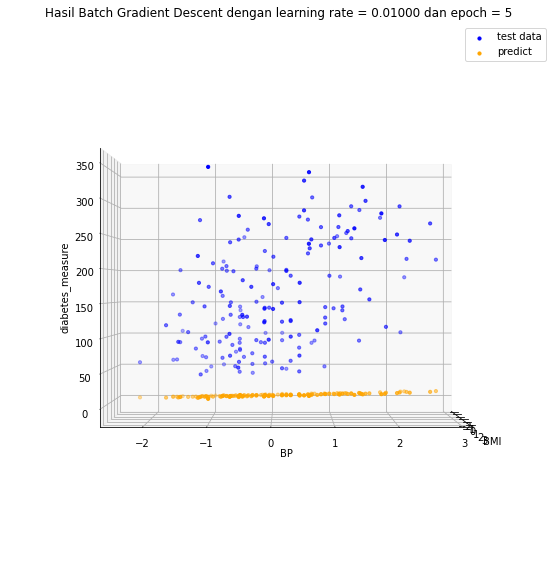

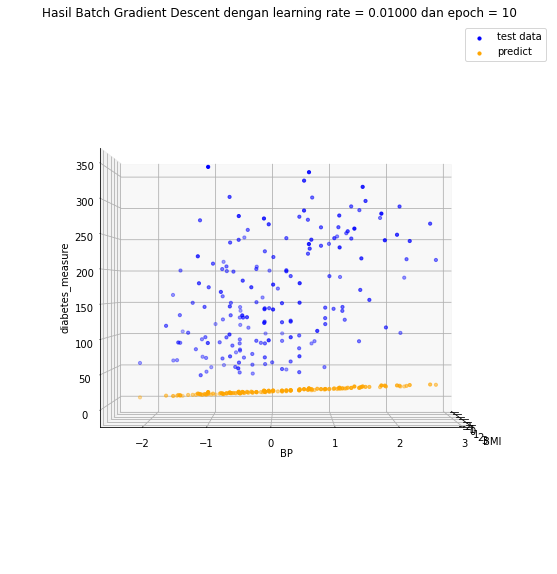

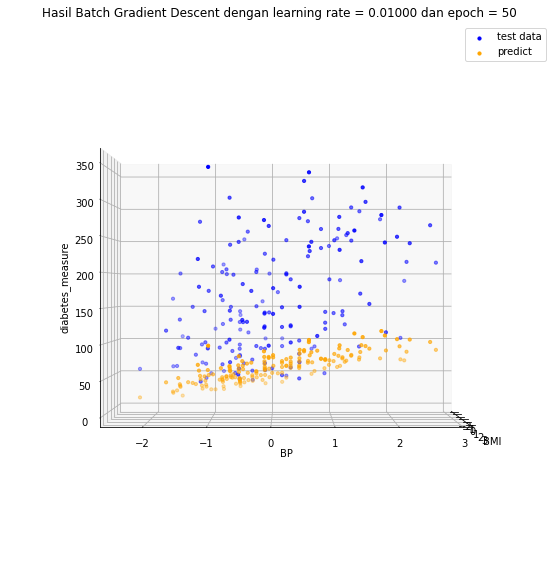

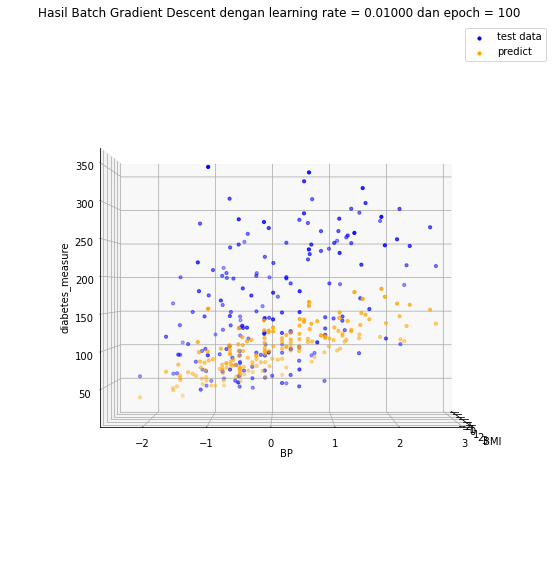

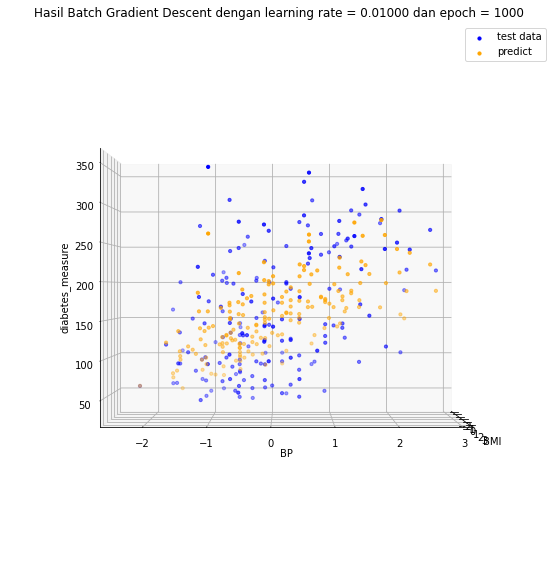

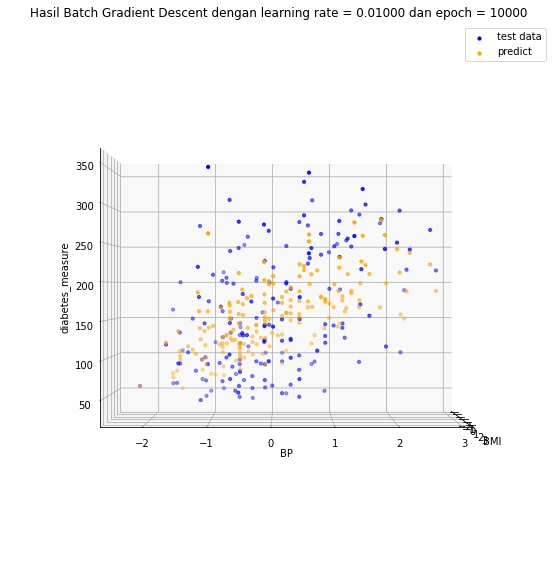

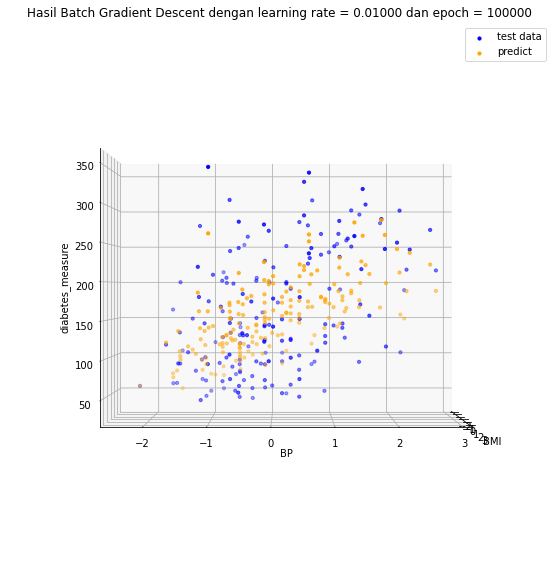

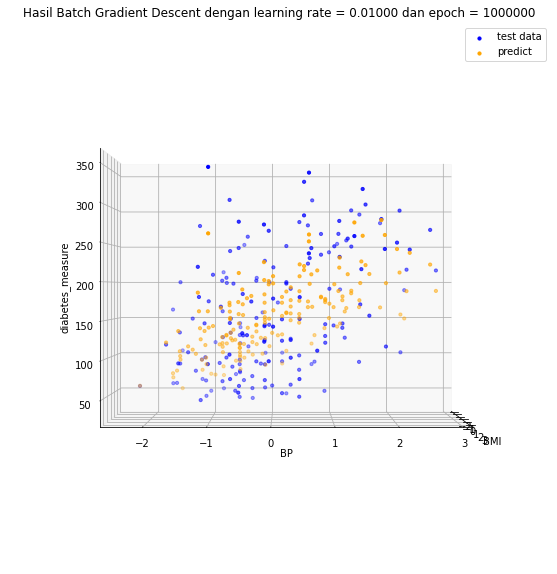

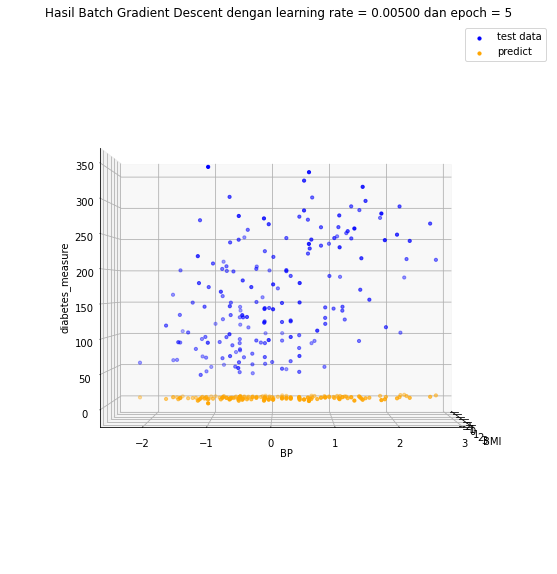

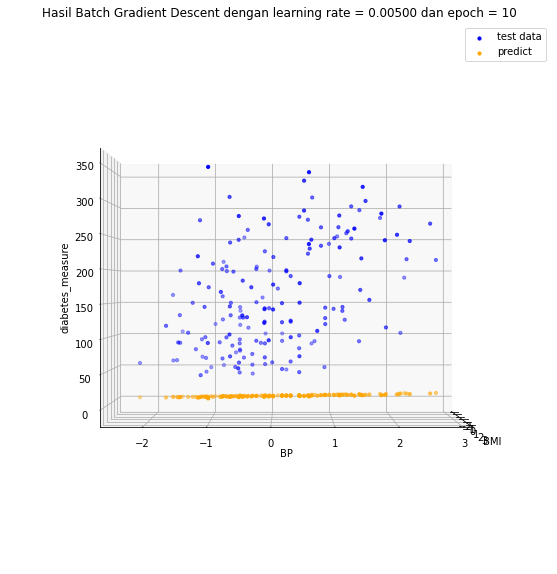

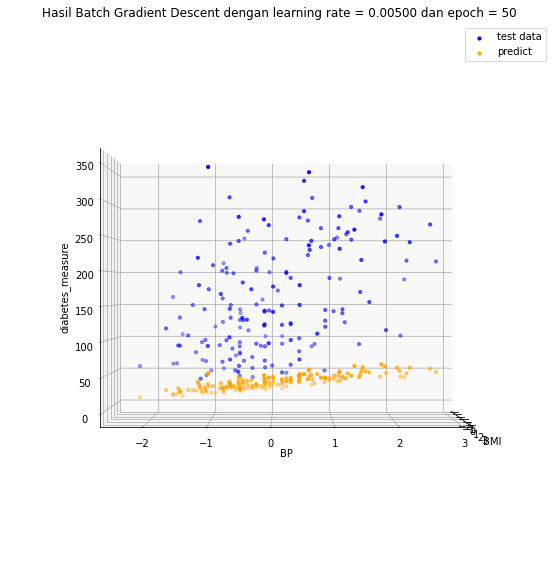

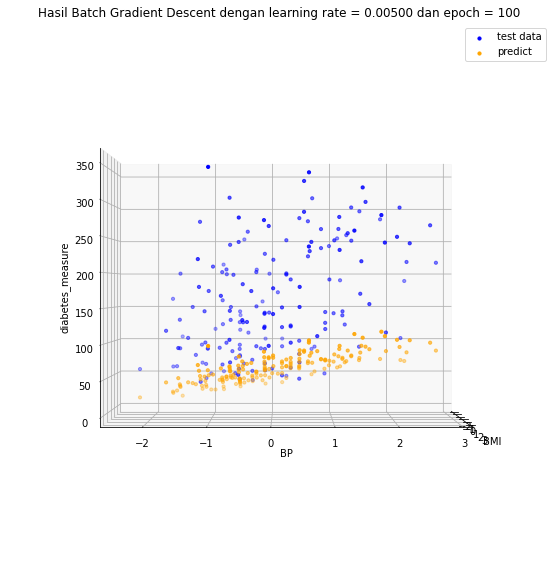

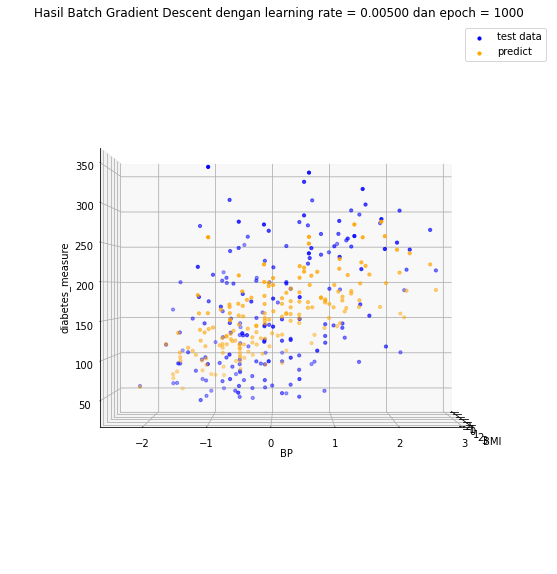

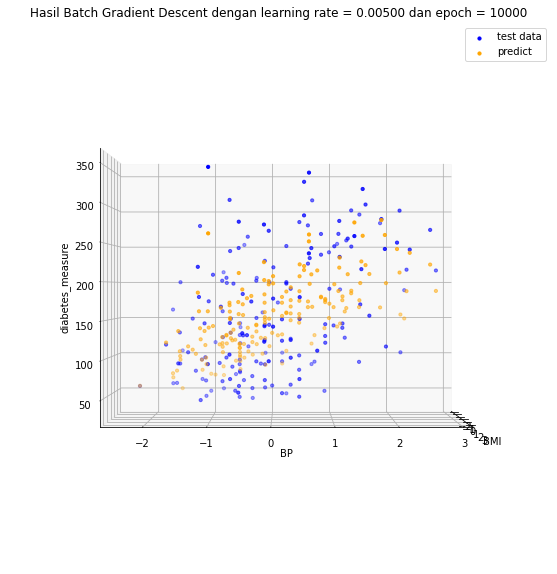

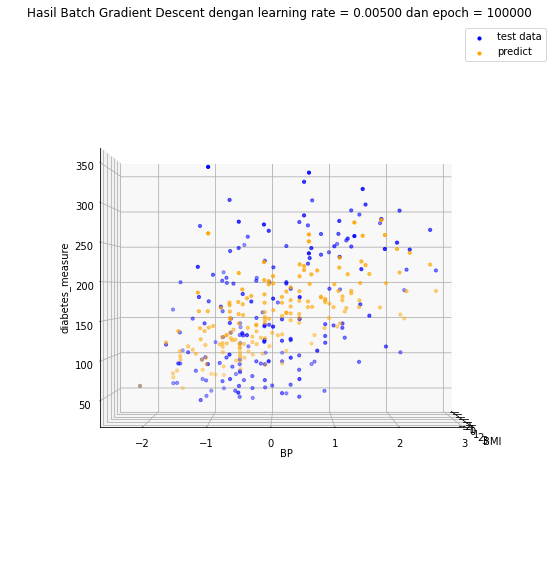

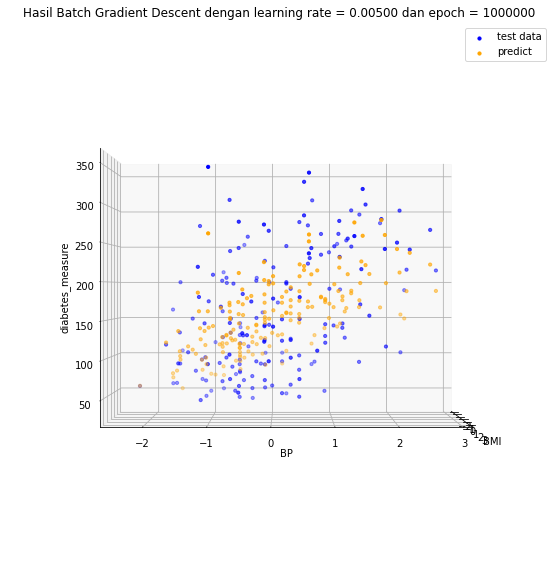

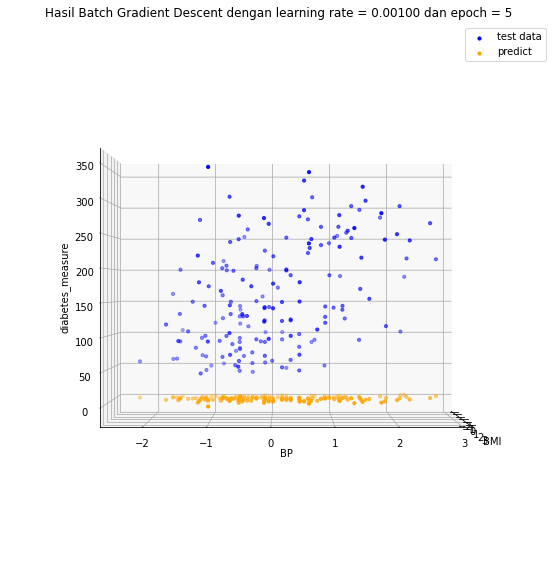

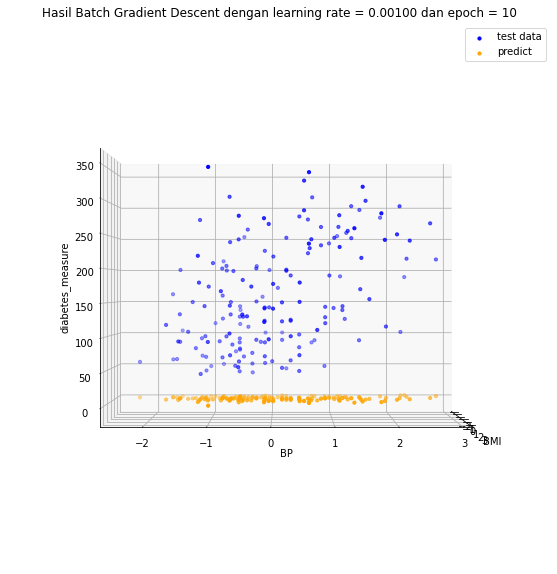

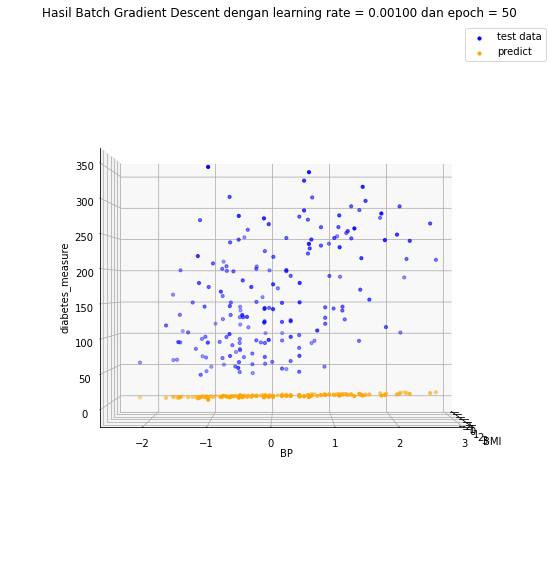

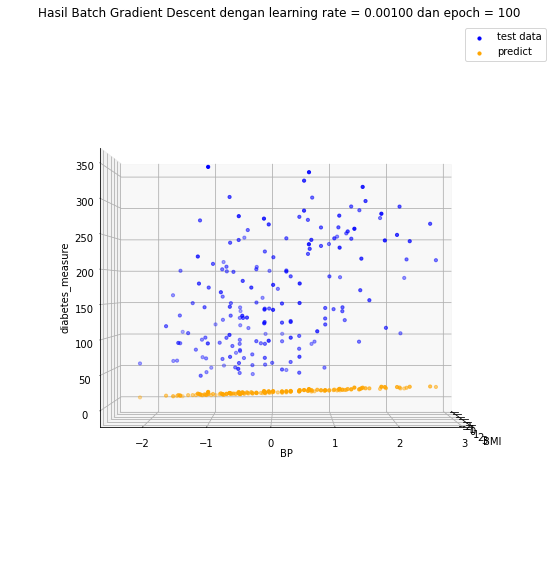

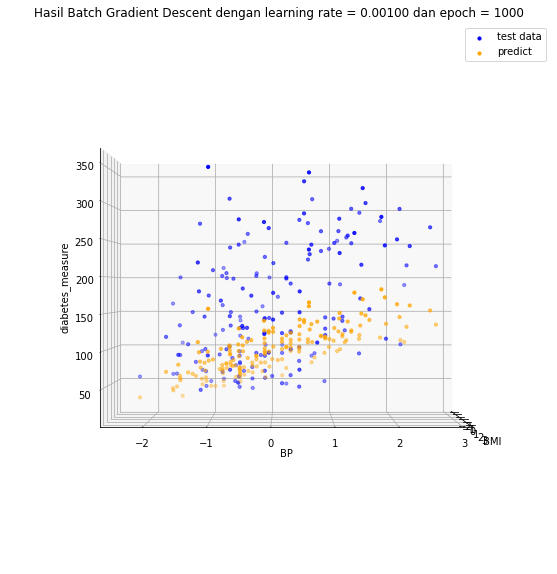

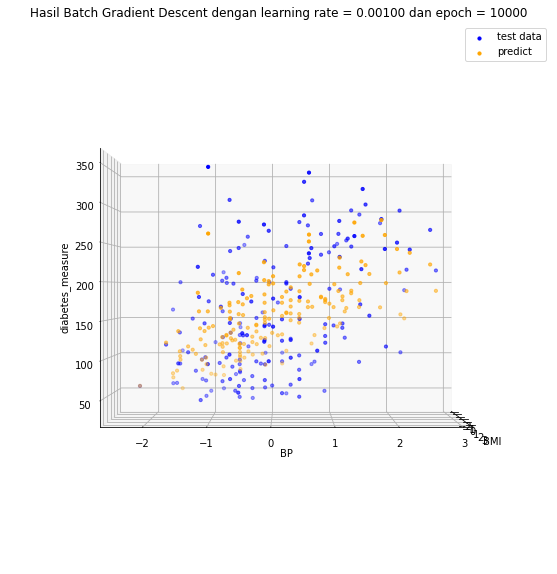

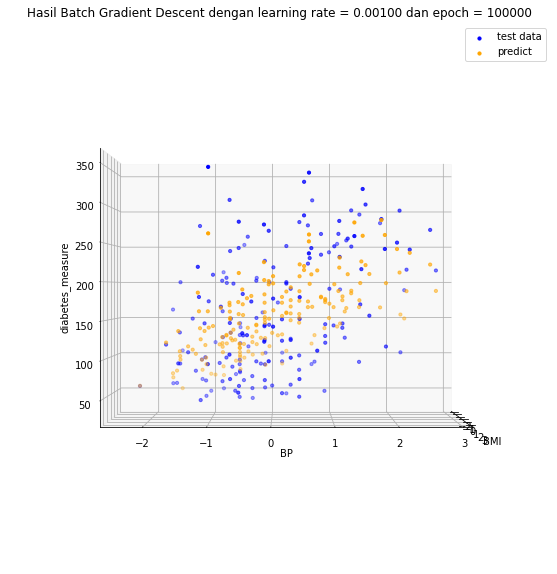

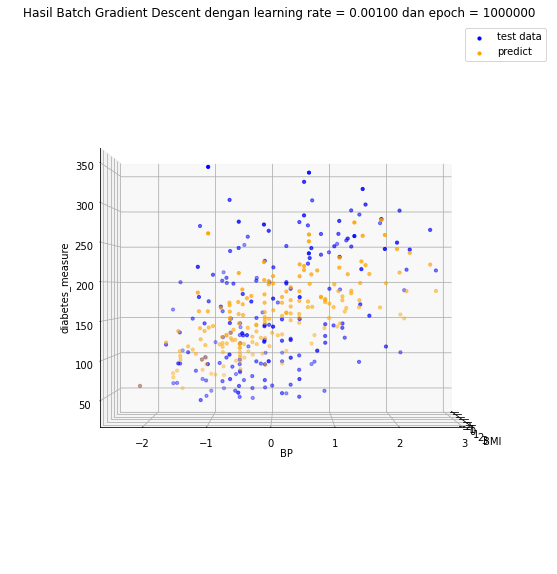

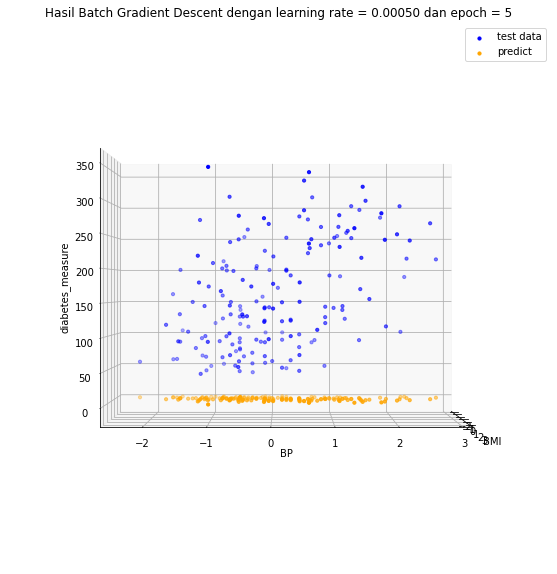

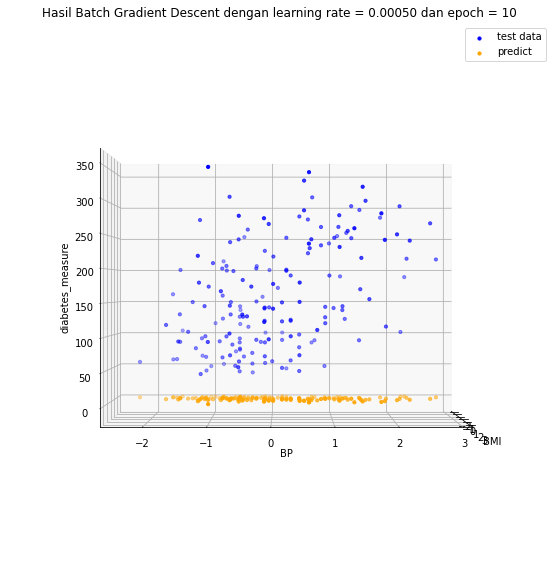

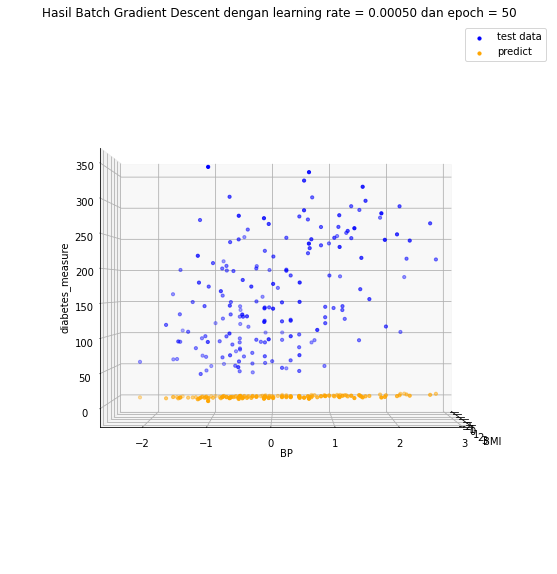

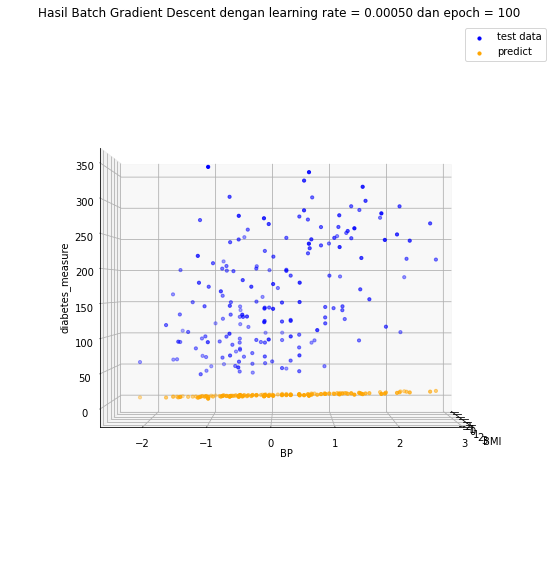

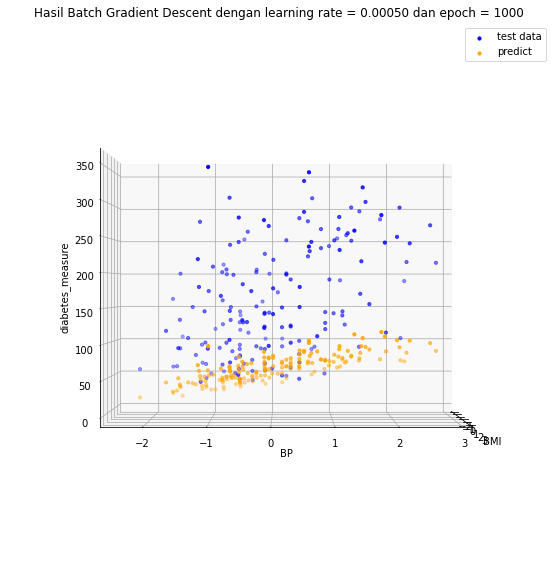

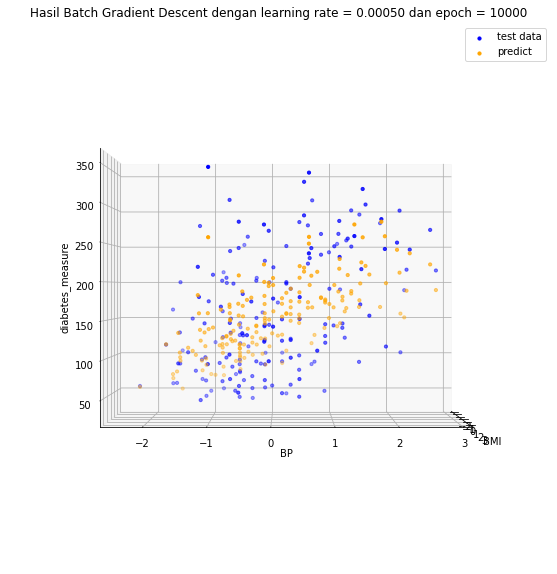

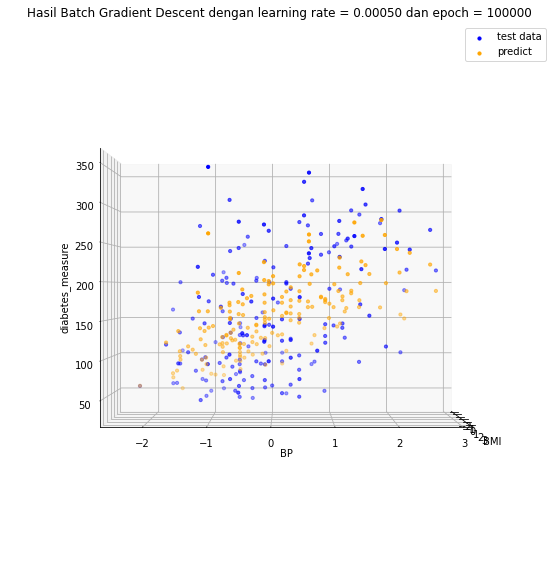

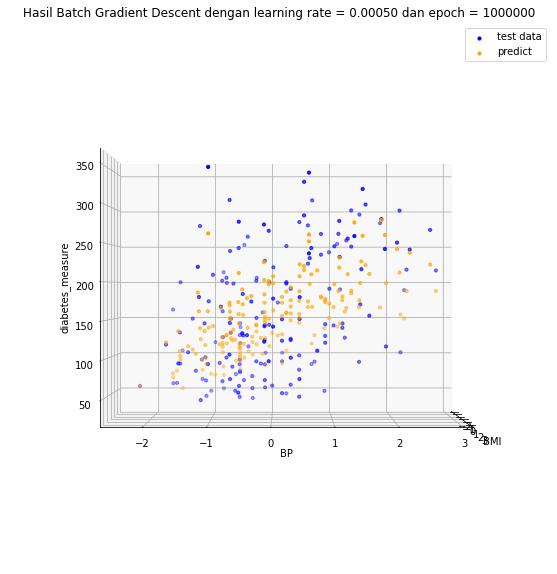

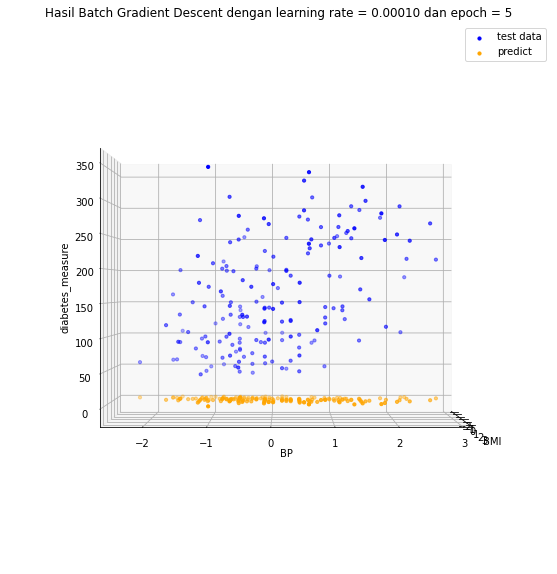

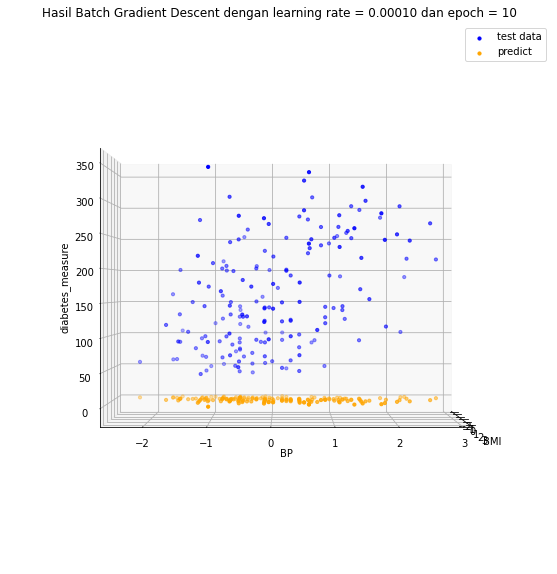

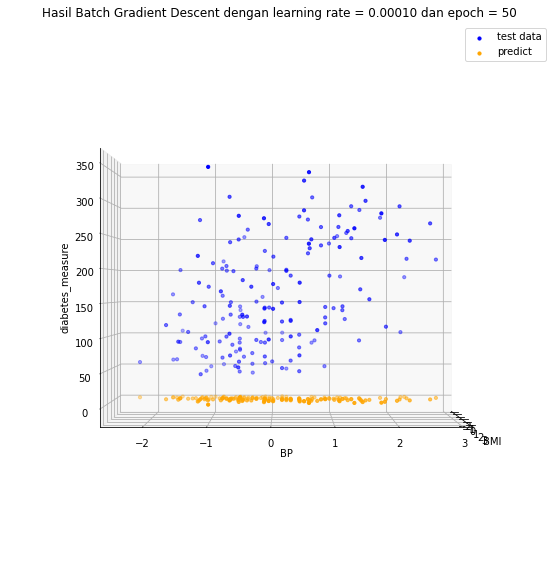

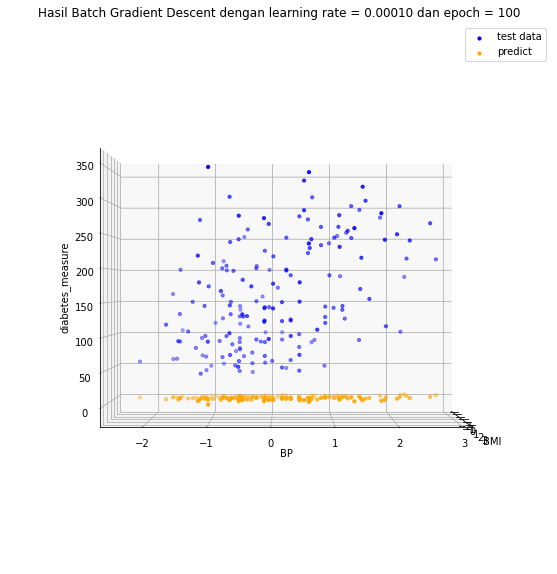

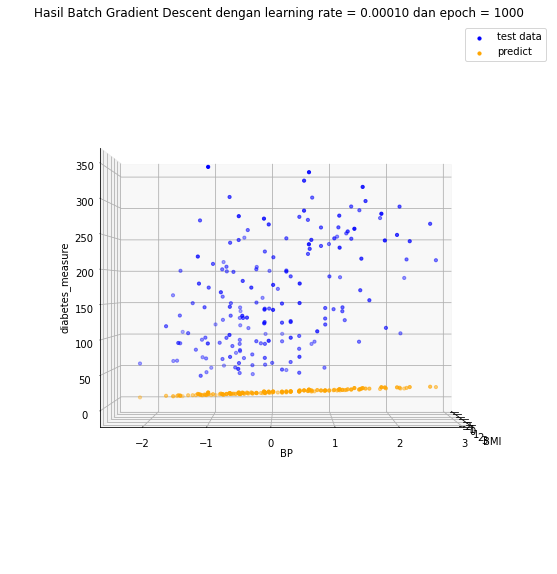

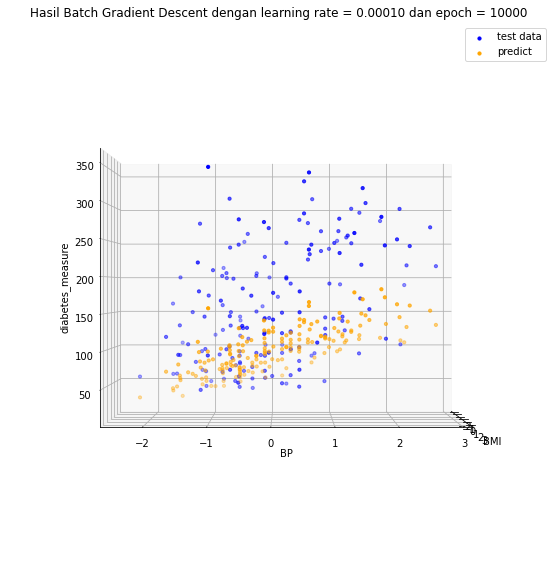

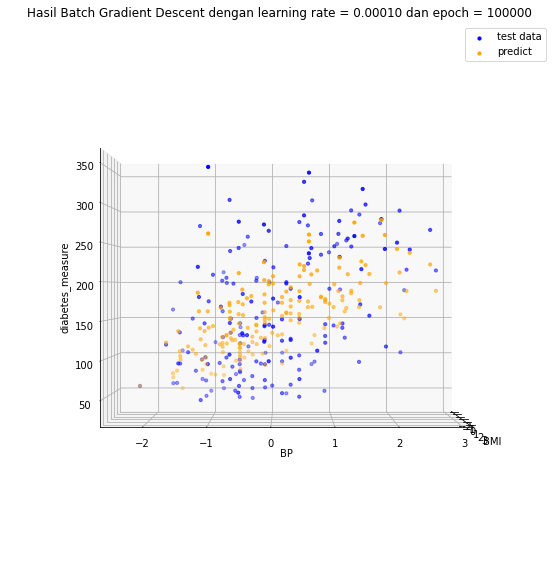

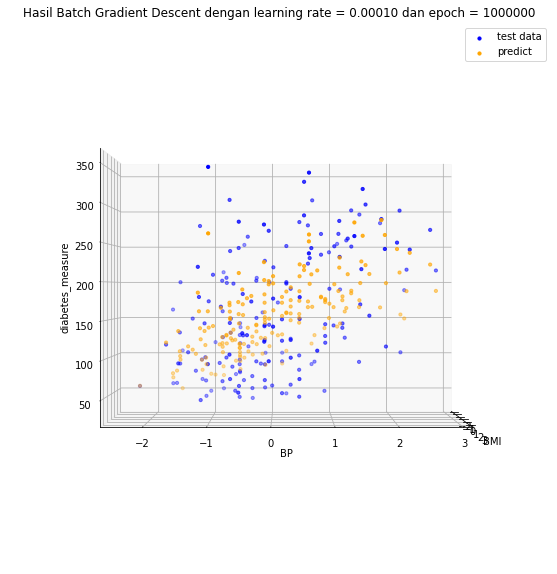

In [125]:
## Memvisualisasikan hasil regresi menggunakan scatter plot BP vs diabetes_measure
for i in range(len(learning_rates)):
    for j in range(len(epochs)):
        fig = plt.figure(figsize=(10,10))
        ax = fig.gca(projection = '3d')
        ax.scatter(x_test_data_diabetes[:,0], x_test_data_diabetes[:,1], y_test_data_diabetes, label='test data', s=10, color='blue')
        ax.scatter(x_test_data_diabetes[:,0], x_test_data_diabetes[:,1], y_pred_batch_grad[i][j], label='predict', s=10, color='orange')
        ax.set_xlabel('BMI')
        ax.set_ylabel('BP')
        ax.set_zlabel('diabetes_measure')
        ax.view_init(0,0)
        ax.set_title('Hasil Batch Gradient Descent dengan learning rate = %.5f dan epoch = %d' % (learning_rates[i], epochs[j]))
        ax.legend()

        plt.show()

In [128]:
data = []
for i in range(len(learning_rates)):
    for j in range(len(epochs)):
        MSE = mean_square_error(vector_origin=y_test_data_diabetes, vector_target=y_pred_batch_grad[i][j])
        RSS = residual_sum_of_squares(vector_origin=y_test_data_diabetes, vector_target=y_pred_batch_grad[i][j])
        L2Norm = l2_norm(vector_origin=y_test_data_diabetes, vector_target=y_pred_batch_grad[i][j])
        CostFunc = cost_function_2(y_pred=y_pred_batch_grad[i][j], y=y_test_data_diabetes)
        data.append([learning_rates[i], epochs[j], L2Norm, RSS, MSE, CostFunc])

df = pd.DataFrame(data, columns=['LearningRate', 'Epoch', 'L2Norm', 'RSS', 'MSE', 'Cost'])
pd.set_option('display.max_rows', df.shape[0]+1)
df

LearningRate    Epoch       L2Norm           RSS           MSE  \
0         0.5000        5   855.012963  7.310472e+05   4153.677080   
1         0.5000       10   846.667213  7.168454e+05   4072.985053   
2         0.5000       50   846.725785  7.169446e+05   4073.548608   
3         0.5000      100   846.725785  7.169446e+05   4073.548606   
4         0.5000     1000   846.725785  7.169446e+05   4073.548609   
5         0.5000    10000   846.725785  7.169446e+05   4073.548606   
6         0.5000   100000   846.725785  7.169446e+05   4073.548609   
7         0.5000  1000000   846.725785  7.169446e+05   4073.548607   
8         0.1000        5  1573.179569  2.474894e+06  14061.897476   
9         0.1000       10  1173.639882  1.377431e+06   7826.310070   
10        0.1000       50   847.451524  7.181741e+05   4080.534574   
11        0.1000      100   846.707781  7.169141e+05   4073.375373   
12        0.1000     1000   846.725740  7.169445e+05   4073.548174   
13        0.1000    10000   846.725740  7.169445e+05   4073.548176   
14        0.1000   100000   846.725739  7.169445e+05   4073.548165   
15        0.1000  1000000   846.725739  7.169445e+05   4073.548167   
16        0.0500        5  1910.876205  3.651448e+06  20746.862908   
17        0.0500       10  1583.906784  2.508761e+06  14254.322167   
18        0.0500       50   876.471725  7.682027e+05   4364.787977   
19        0.0500      100   847.613396  7.184485e+05   4082.093572   
20        0.0500     1000   846.725711  7.169444e+05   4073.547894   
21        0.0500    10000   846.725709  7.169444e+05   4073.547878   
22        0.0500   100000   846.725711  7.169444e+05   4073.547892   
23        0.0500  1000000   846.725711  7.169444e+05   4073.547893   
24        0.0100        5  2255.466446  5.087129e+06  28904.141418   
25        0.0100       10  2160.717302  4.668699e+06  26526.700340   
26        0.0100       50  1598.067040  2.553818e+06  14510.331042   
27        0.0100      100  1198.408841  1.436184e+06   8160.134948   
28        0.0100     1000   846.707097  7.169129e+05   4073.368795   
29        0.0100    10000   846.725585  7.169442e+05   4073.546684   
30        0.0100   100000   846.725585  7.169442e+05   4073.546685   
31        0.0100  1000000   846.725585  7.169442e+05   4073.546681   
32        0.0050        5  2300.690885  5.293179e+06  30074.878121   
33        0.0050       10  2252.631689  5.074350e+06  28831.531404   
34        0.0050       50  1918.042404  3.678887e+06  20902.765136   
35        0.0050      100  1600.602858  2.561930e+06  14556.417667   
36        0.0050     1000   847.760965  7.186987e+05   4083.515076   
37        0.0050    10000   846.725495  7.169441e+05   4073.545813   
38        0.0050   100000   846.725494  7.169441e+05   4073.545811   
39        0.0050  1000000   846.725494  7.169441e+05   4073.545809   
40        0.0010        5  2348.430010  5.515124e+06  31335.929050   
41        0.0010       10  2334.600999  5.450362e+06  30967.964911   
42        0.0010       50  2262.279629  5.117909e+06  29079.029080   
43        0.0010      100  2166.871779  4.695333e+06  26678.030162   
44        0.0010     1000  1200.867515  1.442083e+06   8193.652206   
45        0.0010    10000   846.707011  7.169128e+05   4073.367964   
46        0.0010   100000   846.725117  7.169434e+05   4073.542179   
47        0.0010  1000000   846.725117  7.169434e+05   4073.542181   
48        0.0005        5  2344.306771  5.495774e+06  31225.989977   
49        0.0005       10  2336.786079  5.460569e+06  31025.961250   
50        0.0005       50  2296.013601  5.271678e+06  29952.718507   
51        0.0005      100  2257.104358  5.094520e+06  28946.136832   
52        0.0005     1000  1602.828254  2.569058e+06  14596.922785   
53        0.0005    10000   847.790012  7.187479e+05   4083.794914   
54        0.0005   100000   846.724838  7.169430e+05   4073.539500   
55        0.0005  1000000   846.724838  7.169430e+05   4073.539498   
56        0.00

- Berdasarkan data visualisasi di atas (untuk lebih jelas tinjau visulasisasi `BP vs diabetes_measure`), dan tabel perbandingan untuk setiap entri $\text{LearningRate}$, $\text{epoch}$, $\text{RSS}$, $\text{MSE}$, $\text{L2Norm}$, $\text{Cost}$ terlihat bahwa:
    - $\text{epoch} \leq 50$ dan $\text{learning_rate} = 0.5$, sudah cukup membuat batch gradient descent convergent.
    - untuk $\text{learning_rate} = 0.1$ setidaknya butuh $100 < \text{epoch} \leq 1000$ untuk membuat batch gradient descent convergent.
    - untuk $\text{learning_rate} = 0.05$ setidaknya butuh $1000 < \text{epoch} \leq 10000$ untuk membuat batch gradient descent convergent.
    - untuk $\text{learning_rate} = 0.01$ setidaknya butuh $1000 < \text{epoch} \leq 10000$ untuk membuat batch gradient descent convergent.
    - untuk $\text{learning_rate} = 0.005$ setidaknya butuh $1000 < \text{epoch} \leq 10000$ untuk membuat batch gradient descent convergent.
    - untuk $\text{learning_rate} = 0.001$ setidaknya butuh $10000 < \text{epoch} \leq 100000$ untuk membuat batch gradient descent convergent.
    - untuk $\text{learning_rate} = 0.005$ setidaknya butuh $10000 < \text{epoch} \leq 100000$ untuk membuat batch gradient descent convergent.
    - untuk $\text{learning_rate} = 0.0001$ setidaknya butuh $100000 < \text{epoch} \leq 1000000$ untuk membuat batch gradient descent convergent.
- 5 (dari lab) + 3 (tambahan mandiri) $\text{learning_rate}$ mencapai ke-konvergenan yang mirip atau relatif sama sehingga model tersebut sudah mencapai global optimum.

12. Bandingkan hasil regresi yang anda peroleh dari penggunaan metode **Closed-form Least-Squares Solution Linear Regression** dan **Batch Gradient-Descent Regression**.

Berdasarkan hasil **Closed-Form Least-Squares Solution Linear Regression** dengan **Batch Gradient-Descent Regression** didapatkan bahwa kedua metode tersebut memilki bentuk prediksi akhir yang relatif sama untuk data test yang sama dan data train yang sama. Tidak ada yang lebih unggul dalam hal meninimumkan `error` untuk kedua metode untuk spesifik kasus ini (dan juga fitur-nya).